<a href="https://colab.research.google.com/github/AmanMinhas/Eth-Price-Prediction-Time-Series/blob/main/eth_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import ETH CSV Data from Google Drive

In [244]:
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
import sys

drive.mount('/content/gdrive')
base_dir_path = "gdrive/My Drive/UpGrad/LJMU_ETH"
sys.path.insert(0, base_dir_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [245]:
# import libraties
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [246]:
# Create ratings dataframe from csv
# eth_history_df = pd.read_csv(f"{base_dir_path}/ETH_day.csv")
# eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD.csv")
eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD-2017-to-2022.csv")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [247]:
eth_history_df.shape

(1656, 7)

## EDA

In [248]:
# Check null values
eth_history_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [249]:
eth_history_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [250]:
eth_history_df['Date']= pd.to_datetime(eth_history_df['Date'])

In [251]:
eth_history_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [252]:
eth_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1656 non-null   datetime64[ns]
 1   Open       1656 non-null   float64       
 2   High       1656 non-null   float64       
 3   Low        1656 non-null   float64       
 4   Close      1656 non-null   float64       
 5   Adj Close  1656 non-null   float64       
 6   Volume     1656 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 90.7 KB


In [253]:
eth_history_df.head(5)

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [254]:
print(min(eth_history_df.Date))
print(max(eth_history_df.Date))

2017-11-09 00:00:00
2022-05-22 00:00:00


In [255]:
max(eth_history_df.Date) - min(eth_history_df.Date)

Timedelta('1655 days 00:00:00')

In [256]:
eth_history_df["Volume_in_mil"] = eth_history_df.Volume/1000000
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [257]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [258]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [259]:
eth_history_df = eth_history_df.sort_values(by="Date")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [260]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [261]:
# Minimum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.min()]

Date       Open       High        Low      Close  Adj Close  \
400 2018-12-14  86.630356  87.144943  83.226479  84.308296  84.308296   

         Volume  Volume_in_mil  
400  1651491877    1651.491877

In [262]:
# Maximum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.max()]

Date         Open         High          Low        Close  \
1460 2021-11-08  4619.649414  4822.363281  4619.649414  4812.087402   

        Adj Close       Volume  Volume_in_mil  
1460  4812.087402  19290896267   19290.896267

In [263]:
# Minimum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.min()]

Date        Open        High        Low       Close   Adj Close  \
8 2017-11-17  330.166992  334.963989  327.52301  332.394012  332.394012   

      Volume  Volume_in_mil  
8  621732992     621.732992

In [264]:
# Maximum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.max()]

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   

        Adj Close       Volume  Volume_in_mil  
1287  2460.679199  84482912776   84482.912776

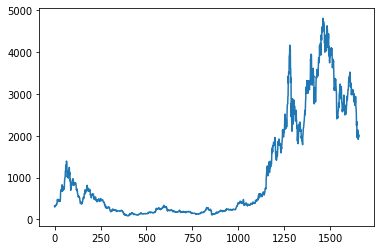

In [265]:
plt.plot(eth_history_df.Close)

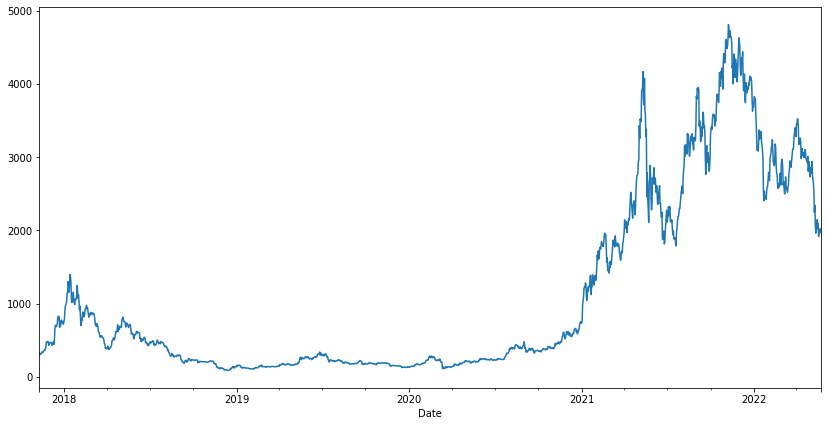

In [266]:
eth_history_date_index_df = eth_history_df.copy()
eth_history_date_index_df = eth_history_date_index_df.set_index('Date')
eth_history_date_index_df.Close.plot(figsize=(14,7))

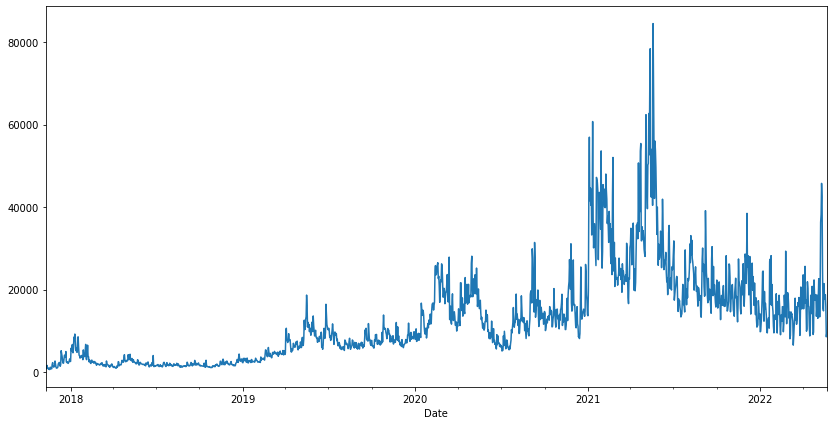

In [267]:
eth_history_date_index_df.Volume_in_mil.plot(figsize=(14,7))

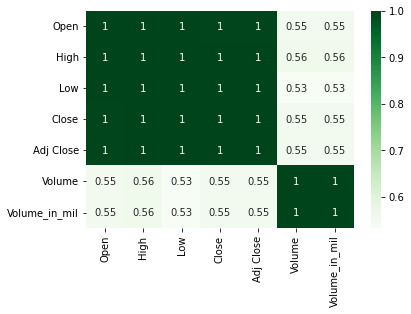

In [268]:
sns.heatmap(eth_history_date_index_df.corr(), annot=True, cmap="Greens")
plt.show()

In [269]:
eth_history_df.Close

0        320.884003
1        299.252991
2        314.681000
3        307.907990
4        316.716003
           ...     
1651    1916.656128
1652    2018.336182
1653    1961.315674
1654    1974.518311
1655    2017.376343
Name: Close, Length: 1656, dtype: float64

In [270]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [271]:
# Calculate deltaClose and deltaPctClose
eth_history_df['deltaClose'] = eth_history_df['Close'].diff()
eth_history_df['deltaPctClose'] = eth_history_df['Close'].pct_change()
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
0      320.884003    893249984     893.249984         NaN            NaN  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1651 rows x 10 columns]

In [272]:
eth_history_df.shape

(1656, 10)

In [273]:
# Drop first row where deltaClose is NaN
eth_history_df = eth_history_df.iloc[1:, :]
eth_history_df.shape

(1655, 10)

In [274]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
5    2017-11-14   316.763000   340.177002   316.763000   337.631012   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
5      337.631012   1069680000    1069.680000   20.915009       0.066037  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1650 rows x 10 columns]

In [275]:
def print_col_min_max(df, col):
  display(df[(df[col] == df[col].max()) | (df[col] == df[col].min())])

print_col_min_max(eth_history_df, 'deltaClose')
print_col_min_max(eth_history_df, 'deltaPctClose')

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   
1292 2021-05-24  2099.936035  2672.595703  2090.639648  2643.591064   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1287  2460.679199  84482912776   84482.912776 -919.390869      -0.272003  
1292  2643.591064  53697121740   53697.121740  534.011230       0.253136

Date        Open        High         Low       Close   Adj Close  \
33  2017-12-12  522.286011  657.317993  504.493988  651.431030  651.431030   
854 2020-03-12  194.738922  195.147934  111.210709  112.347122  112.347122   

          Volume  Volume_in_mil  deltaClose  deltaPctClose  
33    5179829760    5179.829760  136.295044       0.264581  
854  22134741655   22134.741655  -82.521408      -0.423472

In [276]:
eth_history_df.loc['2020-03-10':'2020-03-15']

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [277]:
eth_history_df.loc['2017-12-10':'2017-12-15']
# eth_history_df.loc[(eth_history_df.index.month==12)].head(15)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [278]:
eth_history_df.head(20)

Date        Open        High         Low       Close   Adj Close  \
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5  2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6  2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7  2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8  2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9  2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10 2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11 2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12 2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13 2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14 2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   
15 2017-11-24  412.501007  480.972992  402.757996  474.911011  474.911011   
16 2017-11-25  475.675995  485.191986  461.053009  466.276001  466.276001   
17 2017-11-26  465.973999  472.722992  451.605988  471.329987  471.329987   
18 2017-11-27  471.531006  493.404999  468.484985  480.355011  480.355011   
19 2017-11-28  480.518005  482.480011  466.346985  472.902008  472.902008   
20 2017-11-29  473.281006  522.307007  425.071014  427.523010  427.523010   

        Volume  Volume_in_mil  deltaClose  deltaPctClose  
1    885985984     885.985984  -21.631012      -0.067411  
2    842300992     842.300992   15.428009       0.051555  
3   1613479936    1613.479936   -6.773010      -0.021523  
4   1041889984    1041.889984    8.808013       0.028606  
5   1069680000    1069.680000   20.915009       0.066037  
6    722665984     722.665984   -4.274017      -0.012659  
7    797254016     797.254016   -2.432984      -0.007298  
8    621732992     621.732992    1.470001       0.004442  
9    649638976     649.638976   15.217988       0.045783  
10  1181529984    1181.529984    6.773986       0.019487  
11   807027008     807.027008   12.344025       0.034832  
12   949912000     949.912000   -6.329010      -0.017258  
13   800819008     800.819008   20.251007       0.056190  
14  1845680000    1845.680000   29.513977       0.077535  
15  2292829952    2292.829952   64.745026       0.157851  
16  1422080000    1422.080000   -8.635010      -0.018182  
17  1197779968    1197.779968    5.053986       0.010839  
18  1396480000    1396.480000    9.025024       0.019148  
19  1346499968    1346.499968   -7.453003      -0.015516  
20  2675940096    2675.940096  -45.378998      -0.095959

In [279]:
eth_history_df = eth_history_df.set_index('Date')

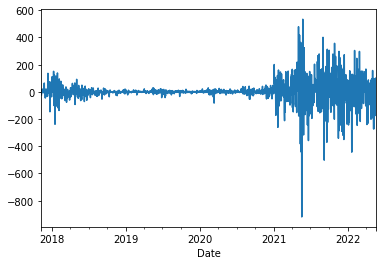

In [280]:
# Plot deltaClose
eth_history_df.deltaClose.plot()

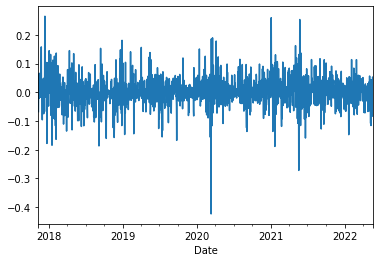

In [281]:
# Plot deltaPctClose
# plt.plot(eth_history_df.deltaPctClose)
eth_history_df.deltaPctClose.plot()

In [282]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1655.000000  1655.000000  1655.000000  1655.000000  1655.000000   
mean   1090.036278  1126.224181  1048.963612  1090.811581  1090.811581   
std    1257.679934  1296.423071  1212.807284  1257.231479  1257.231479   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.936753   204.721497   194.634827   199.030334   199.030334   
50%     402.142944   417.159210   390.609985   403.997040   403.997040   
75%    1896.623963  1971.903321  1811.487244  1905.000427  1905.000427   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil   deltaClose  deltaPctClose  
count  1.655000e+03    1655.000000  1655.000000    1655.000000  
mean   1.266486e+10   12664.856986     1.025071       0.002436  
std    1.116051e+10   11160.508713    80.388975       0.051012  
min    6.217330e+08     621.732992  -919.390869      -0.423472  
25%    3.426054e+09    3426.054254    -9.499260      -0.021530  
50%    9.926712e+09    9926.711979     0.371323       0.001544  
75%    1.803431e+10   18034.306122    13.964226       0.028021  
max    8.448291e+10   84482.912776   534.011230       0.264581

In [283]:
df_close = eth_history_df.reset_index()['Close']
df_deltaClose = eth_history_df.reset_index()['deltaClose']
df_deltaPctClose = eth_history_df.reset_index()['deltaPctClose']

In [284]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [285]:
print(df_close)
print(df_deltaClose)
print(df_deltaPctClose)

0        299.252991
1        314.681000
2        307.907990
3        316.716003
4        337.631012
           ...     
1650    1916.656128
1651    2018.336182
1652    1961.315674
1653    1974.518311
1654    2017.376343
Name: Close, Length: 1655, dtype: float64
0       -21.631012
1        15.428009
2        -6.773010
3         8.808013
4        20.915009
           ...    
1650   -173.753052
1651    101.680054
1652    -57.020508
1653     13.202637
1654     42.858032
Name: deltaClose, Length: 1655, dtype: float64
0      -0.067411
1       0.051555
2      -0.021523
3       0.028606
4       0.066037
          ...   
1650   -0.083119
1651    0.053051
1652   -0.028251
1653    0.006732
1654    0.021706
Name: deltaPctClose, Length: 1655, dtype: float64


### Time Resampling

In [286]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [287]:
# Rules 
rule_desc = {
    "MS": "Montly Start Frequency",
    "QS": "Quarterly Start Frequency",
    "A": "Year End Frequency",
}

In [288]:
# Check Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-12-31  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2019-12-31   336.959900   361.398682   315.954865   336.753174   336.753174   
2020-12-31   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-12-31  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-12-31  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31   5179829760    5179.829760  136.295044       0.264581  
2018-12-31   9214950400    9214.950400  151.209961       0.180750  
2019-12-31  18661465873   18661.465873   30.004486       0.156042  
2020-12-31  31421134556   31421.134556   50.385926       0.189404  
2021-12-31  84482912776   84482.912776  534.011230       0.259475  
2022-12-31  45743399154   45743.399154  304.424316       0.113627

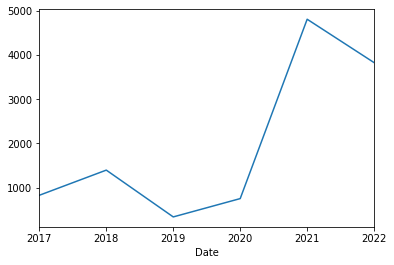

In [289]:
# Plot Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()['Close'].plot()

In [290]:
# Check Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-01-01  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2018-04-01   816.088013   835.057007   784.237000   816.119995   816.119995   
2018-07-01   500.838013   513.432983   488.416992   501.002014   501.002014   
2018-10-01   233.220001   234.145004   226.945007   230.768005   230.768005   
2019-01-01   158.902405   165.549622   154.337418   158.795425   158.795425   
2019-04-01   336.959900   361.398682   315.954865   336.753174   336.753174   
2019-07-01   313.325165   318.223114   305.285828   313.251404   313.251404   
2019-10-01   193.191071   195.942505   188.667679   193.293259   193.293259   
2020-01-01   284.561310   287.123688   264.279663   284.217499   284.217499   
2020-04-01   247.548538   252.222000   242.819748   247.444946   247.444946   
2020-07-01   477.007874   487.211884   432.079193   477.051910   477.051910   
2020-10-01   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-01-01  1959.902954  2036.286499  1896.684448  1960.164795  1960.164795   
2021-04-01  4174.635742  4362.350586  3785.848633  4168.701172  4168.701172   
2021-07-01  3951.520752  4022.469238  3868.994385  3952.133545  3952.133545   
2021-10-01  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-01-01  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   
2022-04-01  3522.364990  3573.960205  3442.000244  3522.833496  3522.833496   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01   5179829760    5179.829760  136.295044       0.264581  
2018-01-01   9214950400    9214.950400  151.209961       0.144702  
2018-04-01   4316120064    4316.120064   92.394043       0.144937  
2018-07-01   2836200000    2836.200000   30.807984       0.152855  
2018-10-01   4370343387    4370.343387   21.071106       0.180750  
2019-01-01   5957715043    5957.715043   14.732445       0.140933  
2019-04-01  18661465873   18661.465873   30.004486       0.156042  
2019-07-01  11757739233   11757.739233   18.153443       0.071311  
2019-10-01  13831784986   13831.784986   19.354660       0.119349  
2020-01-01  27864623061   27864.623061   29.554932       0.189404  
2020-04-01  28089191904   28089.191904   25.589234       0.178264  
2020-07-01  31421134556   31421.134556   41.972168       0.114729  
2020-10-01  31104004592   31104.004592   50.385926       0.098177  
2021-01-01  60733630300   60733.630300  200.972717       0.259475  
2021-04-01  84482912776   84482.912776  534.011230       0.253136  
2021-07-01  39131346397   39131.346397  401.095459       0.116810  
2021-10-01  38478999182   38478.999182  357.061524       0.101889  
2022-01-01  29312342666   29312.342666  304.424316       0.113627  
2022-04-01  45743399154   45743.399154  167.909424       0.056465

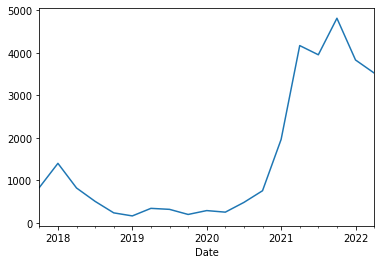

In [291]:
# Plot Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()['Close'].plot()

In [292]:
# Check Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-12-31    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-12-31   104.645050   106.058876   102.934563   104.535301   104.535301   
2020-12-31   110.406784   116.021622    95.184303   110.605873   110.605873   
2021-12-31   730.402649   749.201843   718.109497   730.367554   730.367554   
2022-12-31  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31    621732992     621.732992 -146.203003      -0.178066  
2018-12-31    948488000     948.488000 -238.230103      -0.186866  
2019-12-31   2212109224    2212.109224  -42.485535      -0.167444  
2020-12-31   5109032700    5109.032700  -82.521408      -0.423472  
2021-12-31  10894785525   10894.785525 -919.390869      -0.272003  
2022-12-31   6532996574    6532.996574 -443.188476      -0.147674

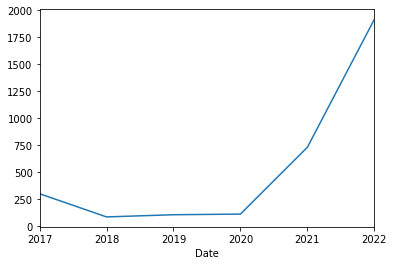

In [293]:
# Plot Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()['Close'].plot()

In [294]:
# Check Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-01-01   385.904999   409.928986   368.632996   385.967987   385.967987   
2018-04-01   370.380005   385.195007   363.804993   370.285004   370.285004   
2018-07-01   183.679001   185.587006   170.257004   183.330994   183.330994   
2018-10-01    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-01-01   104.645050   106.058876   102.934563   104.535301   104.535301   
2019-04-01   141.465485   142.733994   140.737564   141.830322   141.830322   
2019-07-01   166.651703   170.773514   157.130325   166.727127   166.727127   
2019-10-01   122.656837   128.097565   119.780060   122.603889   122.603889   
2020-01-01   110.406784   116.021622    95.184303   110.605873   110.605873   
2020-04-01   133.612320   135.634552   129.730942   135.634552   135.634552   
2020-07-01   225.288483   229.629318   224.544495   225.387070   225.387070   
2020-10-01   340.943085   342.450836   334.545563   340.815857   340.815857   
2021-01-01   730.402649   749.201843   718.109497   730.367554   730.367554   
2021-04-01  1810.884277  1850.179810  1707.600586  1813.217285  1813.217285   
2021-07-01  1786.276245  1836.998047  1722.050781  1787.510742  1787.510742   
2021-10-01  3001.129395  3329.853516  2978.654297  3307.516113  3307.516113   
2022-01-01  2406.924316  2498.507080  2172.301270  2405.181152  2405.181152   
2022-04-01  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01    621732992     621.732992 -146.203003      -0.178066  
2018-01-01   1151170048    1151.170048 -238.230103      -0.184400  
2018-04-01    948488000     948.488000  -92.742004      -0.130962  
2018-07-01   1164120000    1164.120000  -53.391998      -0.186866  
2018-10-01   1084810000    1084.810000  -36.270004      -0.160651  
2019-01-01   2212109224    2212.109224  -22.942764      -0.147065  
2019-04-01   4611999536    4611.999536  -42.485535      -0.126162  
2019-07-01   5238542572    5238.542572  -41.880737      -0.167444  
2019-10-01   5837211771    5837.211771  -14.235626      -0.082403  
2020-01-01   7430904515    7430.904515  -82.521408      -0.423472  
2020-04-01   5600408178    5600.408178  -23.000564      -0.108698  
2020-07-01   5109032700    5109.032700  -54.368561      -0.136464  
2020-10-01   8125837102    8125.837102  -51.885499      -0.090918  
2021-01-01  13652004358   13652.004358 -260.703125      -0.188605  
2021-04-01  18765854896   18765.854896 -919.390869      -0.272003  
2021-07-01  13296586731   13296.586731 -501.985108      -0.127784  
2021-10-01  10894785525   10894.785525 -350.226318      -0.084709  
2022-01-01   6532996574    6532.996574 -443.188476      -0.147674  
2022-04-01   8546822406    8546.822406 -272.029541      -0.115810

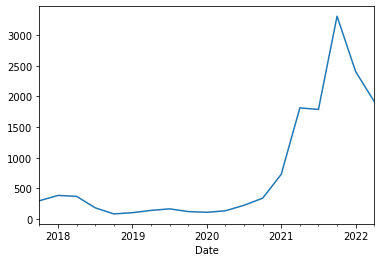

In [295]:
# Plot Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()['Close'].plot()

In [296]:
# Check mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-12-31   485.397384   502.704094   463.143234   483.507727   483.507727   
2019-12-31   181.771947   186.367671   176.947580   181.770137   181.770137   
2020-12-31   305.899433   315.010121   297.221470   307.542978   307.542978   
2021-12-31  2771.215477  2872.125942  2658.899019  2778.354149  2778.354149   
2022-12-31  2884.363482  2956.100795  2795.452046  2872.725646  2872.725646   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-12-31  2.037049e+09    2037.048527    8.381711       0.018814  
2018-12-31  2.276869e+09    2276.869352   -1.707849      -0.003163  
2019-12-31  6.967028e+09    6967.027840   -0.010294       0.000771  
2020-12-31  1.424528e+10   14245.276813    1.661728       0.006070  
2021-12-31  2.728082e+10   27280.819105    8.068026       0.005983  
2022-12-31  1.626140e+10   16261.401599  -11.727158      -0.003378

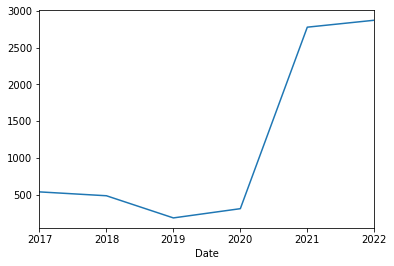

In [297]:
# Plot mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()['Close'].plot()

In [298]:
# Check mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-01-01   871.791709   911.641502   818.832786   867.320934   867.320934   
2018-04-01   574.128099   591.948726   553.943782   574.633165   574.633165   
2018-07-01   341.340281   349.463186   329.785836   338.810457   338.810457   
2018-10-01   163.693786   167.622957   158.729876   162.600609   162.600609   
2019-01-01   130.946503   133.907482   128.210433   131.030422   131.030422   
2019-04-01   218.524983   226.252934   212.650139   220.182696   220.182696   
2019-07-01   212.830744   217.485638   205.900593   211.642078   211.642078   
2019-10-01   164.080147   167.117726   160.357724   163.539845   163.539845   
2020-01-01   184.166511   190.282980   177.310988   184.195056   184.195056   
2020-04-01   204.400526   209.576307   200.072916   205.440528   205.440528   
2020-07-01   341.606476   351.650596   331.544364   343.038269   343.038269   
2020-10-01   490.997786   506.028851   477.598274   495.047509   495.047509   
2021-01-01  1528.509033  1594.946289  1458.077849  1541.277395  1541.277395   
2021-04-01  2593.181946  2719.470675  2442.737247  2597.435252  2597.435252   
2021-07-01  2841.780110  2937.660499  2740.083865  2850.271792  2850.271792   
2021-10-01  4092.440313  4207.002234  3966.242721  4095.572674  4095.572674   
2022-01-01  2939.659597  3018.542529  2849.177338  2935.221465  2935.221465   
2022-04-01  2788.658666  2848.028562  2702.465964  2764.559805  2764.559805   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-10-01  2.037049e+09    2037.048527    8.381711       0.018814  
2018-01-01  3.341332e+09    3341.331567   -4.003066      -0.004936  
2018-04-01  2.170332e+09    2170.331749    0.645308       0.002875  
2018-07-01  1.702962e+09    1702.961632   -2.416652      -0.006083  
2018-10-01  1.914835e+09    1914.834926   -1.081302      -0.004483  
2019-01-01  3.615201e+09    3615.201047    0.090509       0.001510  
2019-04-01  8.675775e+09    8675.775150    1.639361       0.009012  
2019-07-01  7.352821e+09    7352.821448   -1.204606      -0.004241  
2019-10-01  8.170021e+09    8170.021255   -0.546319      -0.003090  
2020-01-01  1.543945e+10   15439.454149    0.043766       0.003119  
2020-04-01  1.417553e+10   14175.526180    1.018917       0.006600  
2020-07-01  1.243379e+10   12433.794811    1.452422       0.005978  
2020-10-01  1.494455e+10   14944.554142    4.107234       0.008558  
2021-01-01  3.244661e+10   32446.605572   13.117318       0.012545  
2021-04-01  3.647458e+10   36474.583603    3.914127       0.004509  
2021-07-01  2.118185e+10   21181.848898    7.903602       0.004106  
2021-10-01  1.923247e+10   19232.470275    7.401672       0.002898  
2022-01-01  1.493472e+10   14934.716189   -4.455444      -0.000440  
2022-04-01  1.855759e+10   18557.587885  -24.312817      -0.008462

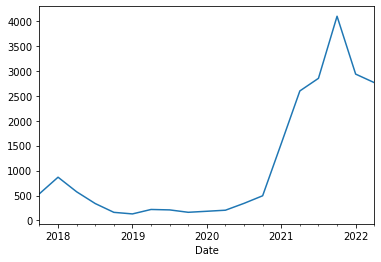

In [299]:
# Plot mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()['Close'].plot()

In [300]:
def plot_resample_with_rule(rule):
  fig, axs = plt.subplots(1, 3, figsize=(20, 4))
  plt.tight_layout()
  fig.autofmt_xdate()

  # plt.title(f"Min Max and Mean for Rule: {rule}")
  axs[0].set_title(f"Min Close Price for Rule: {rule_desc[rule]}")
  axs[0].plot(eth_history_df.resample(rule=rule).min()['Close'])

  axs[1].set_title(f"Max Close Price for Rule: {rule_desc[rule]}")
  axs[1].plot(eth_history_df.resample(rule=rule).max()['Close'])

  axs[2].set_title(f"Avg Close Price for Rule: {rule_desc[rule]}")
  axs[2].plot(eth_history_df.resample(rule=rule).mean()['Close'])

  plt.show()

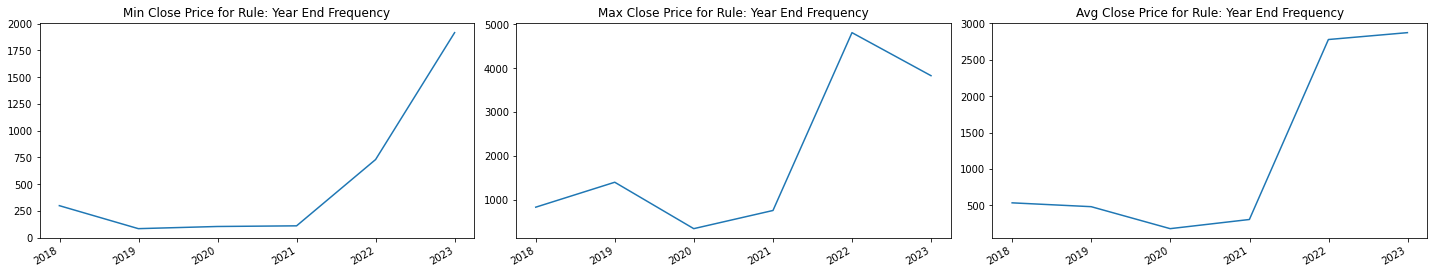

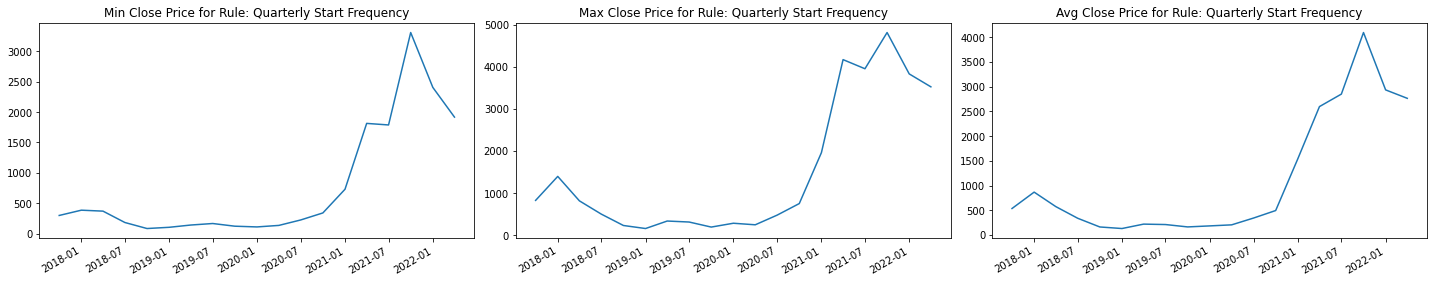

In [301]:
plot_resample_with_rule('A')
plot_resample_with_rule('QS')

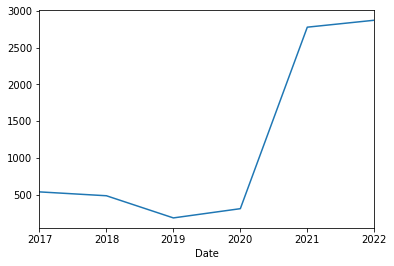

In [302]:
eth_history_df.resample(rule='A').mean()['Close'].plot()

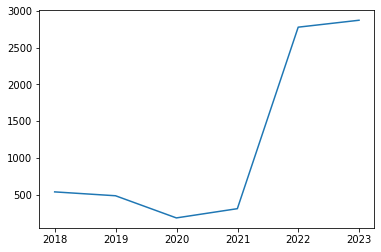

In [303]:
plt.plot(eth_history_df.resample(rule='A').mean()['Close'])

In [304]:
eth_history_df.resample(rule='A').mean()['Close']

Date
2017-12-31     536.148270
2018-12-31     483.507727
2019-12-31     181.770137
2020-12-31     307.542978
2021-12-31    2778.354149
2022-12-31    2872.725646
Freq: A-DEC, Name: Close, dtype: float64

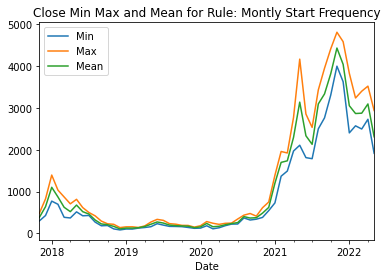

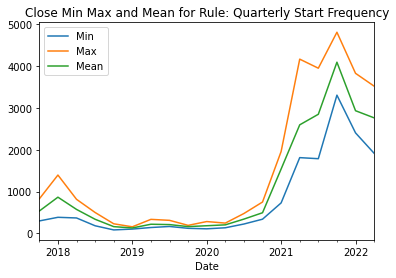

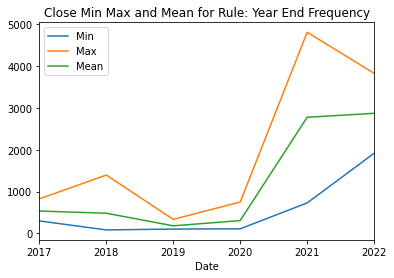

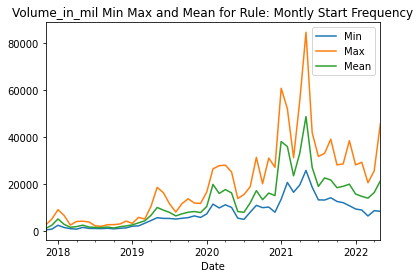

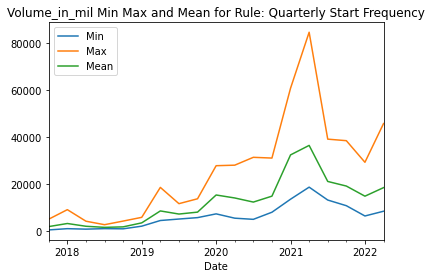

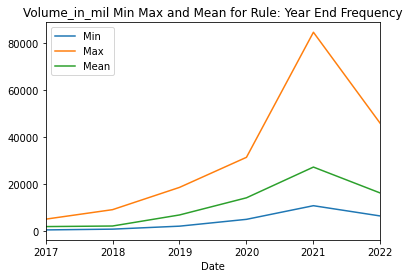

In [305]:
def plot_resample_with_rule_2(rule, column):
  eth_history_df.resample(rule=rule).min()[column].plot(legend=True, label="Min")
  eth_history_df.resample(rule=rule).max()[column].plot(legend=True, label="Max")
  eth_history_df.resample(rule=rule).mean()[column].plot(legend=True, label="Mean")
  plt.title(f"{column} Min Max and Mean for Rule: {rule_desc[rule]}")
  plt.show()

plot_resample_with_rule_2('MS', 'Close')
plot_resample_with_rule_2('QS', 'Close')
plot_resample_with_rule_2('A', 'Close')
plot_resample_with_rule_2('MS', 'Volume_in_mil')
plot_resample_with_rule_2('QS', 'Volume_in_mil')
plot_resample_with_rule_2('A', 'Volume_in_mil')

In [306]:
# eth_history_df.resample(rule="MS").min()['Close']

### Seasonality & Trend Check

In [307]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [308]:
eth_history_df_copy = eth_history_df.copy()
eth_history_df_copy.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [309]:
# eth_history_df_copy.set_index('Date', inplace=True)
# eth_history_df_copy.head()

In [310]:
eth_history_df_copy = eth_history_df_copy[['Close']]
eth_history_df_copy.head()

Close
Date                  
2017-11-10  299.252991
2017-11-11  314.681000
2017-11-12  307.907990
2017-11-13  316.716003
2017-11-14  337.631012

In [311]:
def checkSeasonality(df):
  result = seasonal_decompose(df, model="multiplicative")

  trend = result.trend
  seasonal = result.seasonal
  residual = result.resid

  result.plot()

  return trend, seasonal, residual

(                  Close
 Date                   
 2017-11-10          NaN
 2017-11-11          NaN
 2017-11-12          NaN
 2017-11-13   320.067143
 2017-11-14   324.801575
 ...                 ...
 2022-05-18  2018.524031
 2022-05-19  2000.191110
 2022-05-20          NaN
 2022-05-21          NaN
 2022-05-22          NaN
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10  0.996570
 2017-11-11  1.001954
 2017-11-12  1.002124
 2017-11-13  1.001597
 2017-11-14  1.001585
 ...              ...
 2022-05-18  1.001356
 2022-05-19  0.994813
 2022-05-20  0.996570
 2022-05-21  1.001954
 2022-05-22  1.002124
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10       NaN
 2017-11-11       NaN
 2017-11-12       NaN
 2017-11-13  0.987952
 2017-11-14  1.037854
 ...              ...
 2022-05-18  0.948248
 2022-05-19  1.014333
 2022-05-20       NaN
 2022-05-21       NaN
 2022-05-22       NaN
 
 [1655 rows x 1 columns])

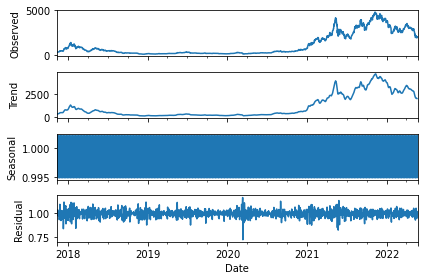

In [312]:
checkSeasonality(eth_history_df_copy)

### Plot Histogram

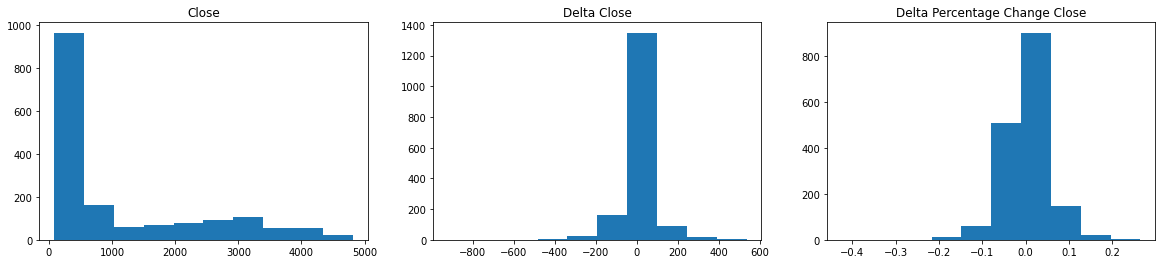

In [313]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axs[0].set_title('Close')
axs[0].hist(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].hist(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].hist(eth_history_df['deltaPctClose'])

plt.show()

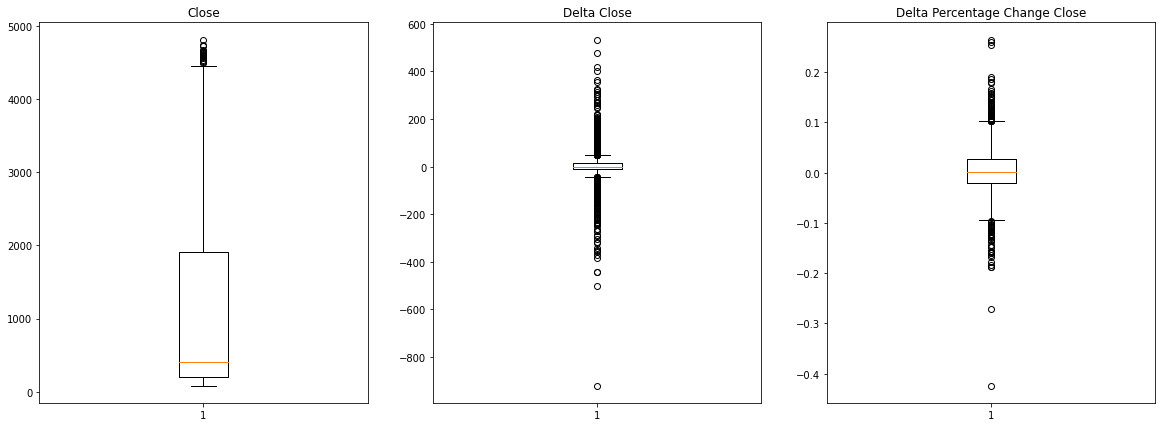

In [314]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

axs[0].set_title('Close')
axs[0].boxplot(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].boxplot(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].boxplot(eth_history_df['deltaPctClose'])

plt.show()

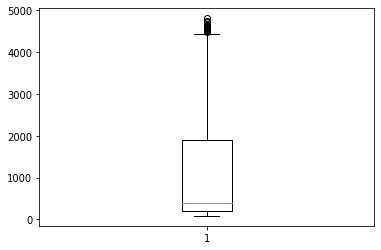

In [315]:
# eth_history_df['Close'].boxplot()
plt.boxplot(eth_history_df['Close'])
plt.show()

In [316]:
print("Close")
print(eth_history_df['Close'].describe())
print("")
print("DeltaClose")
print(eth_history_df['deltaClose'].describe())
print("")
print("DeltaPctClose")
print(eth_history_df['deltaPctClose'].describe())

Close
count    1655.000000
mean     1090.811581
std      1257.231479
min        84.308296
25%       199.030334
50%       403.997040
75%      1905.000427
max      4812.087402
Name: Close, dtype: float64

DeltaClose
count    1655.000000
mean        1.025071
std        80.388975
min      -919.390869
25%        -9.499260
50%         0.371323
75%        13.964226
max       534.011230
Name: deltaClose, dtype: float64

DeltaPctClose
count    1655.000000
mean        0.002436
std         0.051012
min        -0.423472
25%        -0.021530
50%         0.001544
75%         0.028021
max         0.264581
Name: deltaPctClose, dtype: float64


In [317]:
# eth_history_df.loc(2019)['Close']

print(eth_history_df['2019']['Close'].describe())

print(eth_history_df['2021']['Close'].describe())

count    365.000000
mean     181.770137
std       50.382666
min      104.535301
25%      142.398178
50%      173.889969
75%      210.522598
max      336.753174
Name: Close, dtype: float64
count     365.000000
mean     2778.354149
std      1023.543690
min       730.367554
25%      1895.552124
50%      2633.518311
75%      3638.122070
max      4812.087402
Name: Close, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


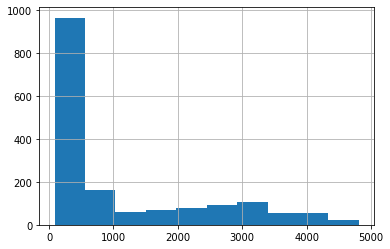

In [318]:
eth_history_df['Close'].hist()

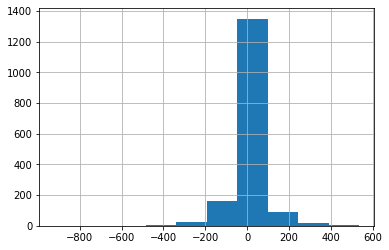

In [319]:
eth_history_df['deltaClose'].hist()

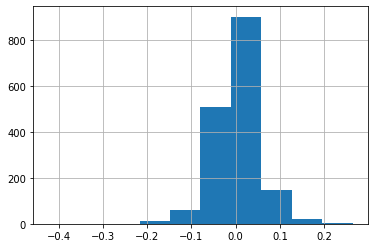

In [320]:
eth_history_df['deltaPctClose'].hist()

### Check Mean and Variance
We will check mean and variance after splitting the data in half

In [321]:
def checkMeanAndVariance(df, col_name):
  # X = series.values
  X = df[[col_name]].copy()
  split = int(len(X)/2)
  X1, X2 = X[0:split], X[split:]

  # mean1, mean2 = round(float(X1.mean()), 2), round(float(X2.mean()), 2)
  # var1, var2 = round(float(X1.var()), 2), round(float(X2.var()), 2)
  mean1, mean2 = float(X1.mean()), float(X2.mean())
  var1, var2 = float(X1.var()), float(X2.var())

  print(f"Analysis for {col_name}")
  print(f"mean1={float(mean1)}, mean2={float(mean2)}")
  print(f"variance1={float(var1)}, variance2={float(var2)}")

  # X1.hist()
  # X2.hist()
  # plt.show()

  fig, axs = plt.subplots(1, 2, figsize=(20, 4))

  # axs[0].set_title(col_name)
  axs[0].hist(X1[col_name])
  axs[1].hist(X2[col_name])

  plt.show()


Analysis for Close
mean1=336.99130479685624, mean2=1843.7214459396118
variance1=66678.96376660561, variance2=1958859.9142969397


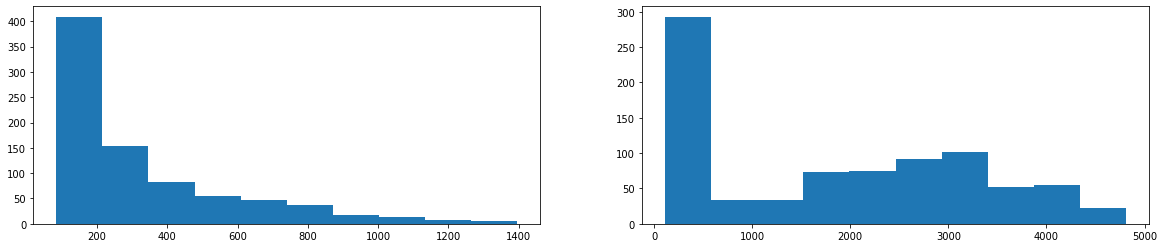

---
Analysis for deltaClose
mean1=-0.044336764207980967, mean2=2.0931870096618352
variance1=711.6047444288109, variance2=12211.744361361849


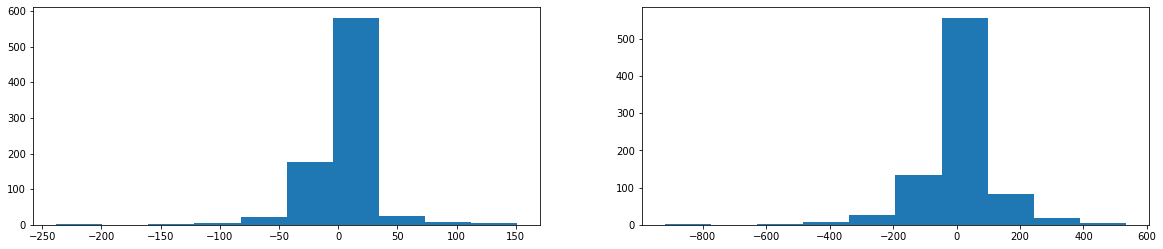

---
Analysis for deltaPctClose
mean1=0.0011225718930756613, mean2=0.003747398607861875
variance1=0.002536055377473825, variance2=0.002668042041104589


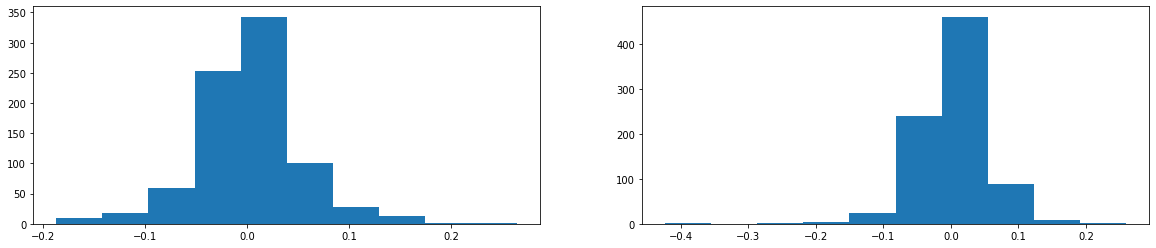

In [322]:
checkMeanAndVariance(eth_history_df, 'Close')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaClose')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaPctClose')

In [323]:
df_deltaPctClose.min(), df_deltaPctClose.max()

(-0.42347221483119923, 0.2645807082093463)

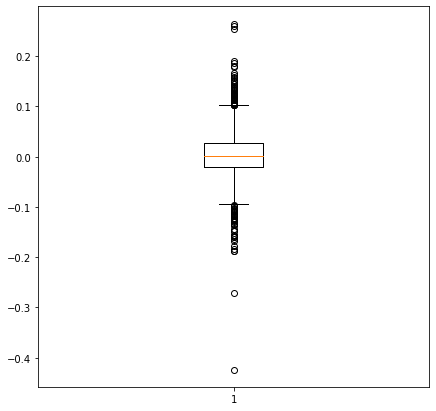

In [324]:
plt.figure(figsize =(7, 7))
plt.boxplot(df_deltaPctClose)
plt.show()

### Augmented Dickey-Fuller test
Read more : https://machinelearningmastery.com/time-series-data-stationary-python/

In [325]:
from statsmodels.tsa.stattools import adfuller

In [326]:
def checkAdfuller(df, col_name):
  s = df[col_name].values
  result = adfuller(s)
  adf_val, p_val = result[0], result[1]
  print(col_name)
  # print('ADF Statistic: %f' % result[0])
  # print('p-value: %f' % result[1])
  print('ADF Statistic: %f' % adf_val)
  print('p-value: %f' % p_val)
  print(f"{col_name} series is", "Stationary" if p_val < 0.05 else "NOT Stationary")

In [327]:
checkAdfuller(eth_history_df, 'Close')
print('---')
checkAdfuller(eth_history_df, 'deltaClose')
print('---')
checkAdfuller(eth_history_df, 'deltaPctClose')

Close
ADF Statistic: -1.115920
p-value: 0.708682
Close series is NOT Stationary
---
deltaClose
ADF Statistic: -10.255242
p-value: 0.000000
deltaClose series is Stationary
---
deltaPctClose
ADF Statistic: -14.812627
p-value: 0.000000
deltaPctClose series is Stationary


In [328]:
# create dataset 
# In this step we use a window length and format the train and test data so that they are in time series format.
# Ex, X = [1, 2, 3], y = [4]
# Ex, X = [2, 3, 4], y = [5]
# Ex, X = [4, 5, 6], y = [6]
# And so on....

def create_Xy_dataset(df, interval, print_samples = False):
  dataX, dataY = [], []

  # print(f"interval = {interval}")
  rangeSize = len(df) - interval

  for i in range(rangeSize):
    x = df[i:i+interval, 0]
    y = df[i+interval, 0]

    if (print_samples):
      # Print some samples
      if (i<5 or i>len(df) - interval - 1 - 5):
        print(f"x = {x}")
        print(f"y = {y}")
        print("")

    dataX.append(x)
    dataY.append(y)
  
  X = np.array(dataX)
  X = X.reshape(X.shape[0], X.shape[1], 1) # reshape for LSTM. Add 3rd dimension
  y = np.array(dataY)

  return X, y

In [329]:
# X, y = create_Xy_dataset(df_close, 3)
print(len(df_close))
# print(X)
# print(y)

1655


## Create Models

In [362]:
# Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D

In [331]:
def getNextNPredictions(interval, X_train, model, num_next_n_predictions):
  # Initialize Prediction Set
  predictions = []
  predictions_flat = []


  # last_batch_start_idx = interval * -1
  # last_train_batch = X_train[last_batch_start_idx:]
  # last_train_batch = last_train_batch.reshape((1, interval, 1))
  # eval_batch = last_train_batch

  eval_batch = X_train[-1:]

  for i in range(num_next_n_predictions):
    # Predict the evaluation batch
    pred = model.predict(eval_batch)[0]

    # Add prediction to predictions array
    predictions.append(pred)
    predictions_flat.append(pred[0])

    # shift eval batch by one by removing the 1st element and adding pred as last element 
    eval_batch = np.append(eval_batch[:, 1:, :], [[pred]], axis=1)
  
  return predictions, predictions_flat


In [363]:
# split into train and test data. By default use 70% data for training and rest for testing.
def df_train_test_split(df, train_size_pct = 0.70):
  training_size = int(len(df) * train_size_pct) # use 70% data to train
  test_size = len(df) - training_size # use the remaining 30% for test

  # print("-------------------------------")
  # print(f"Total Size = {len(df)}")
  # print(f"Train Size = {training_size}")
  # print(f"Test Size = {test_size}")

  train_data = df[0:training_size,:]
  test_data = df[training_size:len(df), :1]

  # print(f"Train data Size = {len(train_data)}")
  # print(f"Test data Size = {len(test_data)}")

  return train_data, test_data

def getScaledDf(df, scaler):
  print('Plot Before Scaling')
  print(plt.plot(df))
  plt.show()
  scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
  print('Plot After Scaling')
  print(plt.plot(scaled_df))
  plt.show()
  return scaled_df

def getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test):
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  # Inverse scale
  if (scaler):
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

  return train_predict, test_predict

def getPredSeries(df, interval, train_predict, test_predict):
  print(f"train_predict length = {len(train_predict)} ")
  print(f"test_predict length = {len(test_predict)} ")

  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(df)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[interval:len(train_predict)+interval, :] = train_predict

  print(f"test_predict range start = {len(train_predict)+(interval*2)+1}")
  print(f"test_predict range end = {len(df)-1}")
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(df)
  testPredictPlot[:, :] = np.nan
  # testPredictPlot[len(train_predict)+(interval*2)+1:len(df)-1, :] = test_predict
  testPredictPlot[len(train_predict)+(interval*2):, :] = test_predict

  return trainPredictPlot, testPredictPlot

def plotSequence(df, interval, scaler, train_predict, test_predict):
  # get train and test predictions for plotting
  # shift train predictions for plotting
  trainPredictPlot, testPredictPlot = getPredSeries(df, interval, train_predict, test_predict)

  # plot baseline and predictions
  if (scaler):
    plt.plot(scaler.inverse_transform(df))
  else:
    plt.plot(df)

  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

def plotResiduals(pred_train_df, pred_test_df):
  fig, axs = plt.subplots(1, 2, figsize=(16, 4))
  train_residual_df = pred_train_df.copy()
  train_residual_df['residual'] = train_residual_df['y_train_actual'] - train_residual_df['train_predict']
  test_residual_df = pred_test_df.copy()
  test_residual_df['residual'] = test_residual_df['y_test_actual'] - test_residual_df['test_predict']

  sns.residplot(x="y_train_actual", y="residual", data=train_residual_df, ax=axs[0])
  axs[0].set(xlabel="Train Actual", ylabel="Residual")
  axs[0].set_title("Train Residuals")

  sns.residplot(x="y_test_actual", y="residual", data=test_residual_df, ax=axs[1])
  axs[1].set(xlabel="Test Actual", ylabel="Residual")
  axs[1].set_title("Test Residuals")

  plt.suptitle("Residual Plot")
  plt.show()

def evaluateIntervalPerformance(model, df, interval, scaler, X_train, y_train, X_test, y_test):
  train_predict, test_predict = getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test)

  if (scaler):
    # print("Test Actual After inverse transform")
    y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
  else:
    y_train_actual = y_train.reshape(-1, 1)
    y_test_actual = y_test.reshape(-1, 1)

  ## TODO - REMOVE
  # print("Test Actual")
  # print(y_test[0:5])
  # if (scaler):
  #   print("Test Actual After inverse transform")
  #   y_test_actual_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
  #   print(y_test_actual_unscaled[0:5])
  # print("Test Predict")
  # print(test_predict[0:5])
  # print("================")
  pred_train_df = pd.DataFrame({
      "y_train": y_train,
      "y_train_actual": y_train_actual[:, 0],
      "train_predict": train_predict[:, 0]
  })
  pred_test_df = pd.DataFrame({
      "y_test": y_test,
      "y_test_actual": y_test_actual[:, 0],
      "test_predict": test_predict[:, 0],
  })
  print("Train")
  display(pred_train_df.head(10))
  print("Test")
  display(pred_test_df.head(10))

  # Calculate RMSE
  rmse_train = math.sqrt(mean_squared_error(y_train_actual, train_predict))
  rmse_test = math.sqrt(mean_squared_error(y_test_actual, test_predict))

  mape_train = mean_absolute_percentage_error(y_train_actual, train_predict)
  mape_test = mean_absolute_percentage_error(y_test_actual, test_predict)

  print(f"RMSE Train = {rmse_train}")
  print(f"RMSE Test = {rmse_test}")
  print(f"MAPE Train = {mape_train}")
  print(f"MAPE Test = {mape_test}")

  plotSequence(df, interval, scaler, train_predict, test_predict)
  plotResiduals(pred_train_df, pred_test_df)

  return pred_train_df, pred_test_df, rmse_train, rmse_test, mape_train, mape_test

def fit_model_on_interval(interval, X_train, y_train, epochs=50, batch_size=32, loss="mean_squared_error", verbose=0):
  model=Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(interval, 1)))
  model.add(LSTM(50, return_sequences=True))
  model.add(LSTM(50))
  model.add(Dense(1))
  # model.add(Dense(1, activation="relu"))
  # model.compile(loss="mean_squared_error", optimizer="adam")
  # model.compile(loss="mean_absolute_percentage_error", optimizer="adam")
  model.compile(loss=loss, optimizer="adam")

  history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    validation_split=0.33
  )

  # plot train and validation loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model train vs validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

  return model


In [364]:
class IntervalBasedModel:
  def __init__(self, df_close, df_deltaClose, df_deltaPctClose):
    self.df_close = df_close
    self.df_deltaClose = df_deltaClose
    self.df_deltaPctClose = df_deltaPctClose
    self.df_metrics = pd.DataFrame({
        "model": [],
        "interval": [],
        "target": [],
        "rmse_train": [],
        "rmse_test": [],
        "mape_train": [],
        "mape_test": [],
    })

    ##################
    # Scale
    ##################
    self.scale()
  
  def scale(self):
    # Initialize Scaler 
    print("Initialize Scaler ")
    self.scalerClose = MinMaxScaler(feature_range=(0,1))
    # scalerDeltaClose = MinMaxScaler(feature_range=(-1,1))
    self.scalerDeltaClose = MinMaxScaler(feature_range=(-0.5,0.5))

    # Scale 
    print("Scaling Close")
    self.close_scaled = getScaledDf(self.df_close, self.scalerClose)
    print("Scaling Delta Close")
    self.deltaClose_scaled = getScaledDf(self.df_deltaClose, self.scalerDeltaClose)
    print("Scaling Delta Pct Close")
    self.deltaPctClose_scaled = np.array(self.df_deltaPctClose).reshape(-1, 1)

  def train_test_split(self):
    # 1. Split data
    # Close
    print("Split Train and Test Data")
    close_train_data, close_test_data = df_train_test_split(self.close_scaled)
    print(f"Close Total data Size = {len(self.close_scaled)}")
    print(f"Close Train data Size = {len(close_train_data)}")
    print(f"Close Test data Size = {len(close_test_data)}")
    print("---------------------")

    # Delta Close
    deltaClose_train_data, deltaClose_test_data = df_train_test_split(self.deltaClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaClose_test_data)}")
    print("---------------------")

    # Delta Pct Close
    deltaPctClose_train_data, deltaPctClose_test_data = df_train_test_split(self.deltaPctClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaPctClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaPctClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaPctClose_test_data)}")
    print("---------------------")
    print("")

    # 2. Format data for time series modeling
    print("Create (X, y) from Train and Test Data")
    # Close
    self.close_X_train, self.close_y_train = create_Xy_dataset(close_train_data, self.interval)
    self.close_X_test, self.close_y_test = create_Xy_dataset(close_test_data, self.interval)
    print("Close train, test length ", len(self.close_X_train), len(self.close_X_test))
    print("Close train shape, test shape ", self.close_X_train.shape, self.close_y_train.shape)
    print("Close test shape, test shape ", self.close_X_test.shape, self.close_y_test.shape)
    print("")

    # Delta Close
    self.deltaClose_X_train, self.deltaClose_y_train = create_Xy_dataset(deltaClose_train_data, self.interval)
    self.deltaClose_X_test, self.deltaClose_y_test = create_Xy_dataset(deltaClose_test_data, self.interval)
    print("Delta Close train, test length ", len(self.deltaClose_X_train), len(self.deltaClose_X_test))
    print("Close train shape, test shape ", self.deltaClose_X_train.shape, self.deltaClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaClose_X_test.shape, self.deltaClose_y_test.shape)
    print("")

    # Delta Percentage Close
    self.deltaPctClose_X_train, self.deltaPctClose_y_train = create_Xy_dataset(deltaPctClose_train_data, self.interval)
    self.deltaPctClose_X_test, self.deltaPctClose_y_test = create_Xy_dataset(deltaPctClose_test_data, self.interval)
    print("Delta Percentage Close train, test length ", len(self.deltaPctClose_X_train), len(self.deltaPctClose_X_test))
    print("Close train shape, test shape ", self.deltaPctClose_X_train.shape, self.deltaPctClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaPctClose_X_test.shape, self.deltaPctClose_y_test.shape)
    print("")
  
  def fit_lstm(self, interval, X_train, y_train, epochs=20, batch_size=16, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, activation="relu", input_shape=(interval, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def fit_stacked_lstm(self, interval, X_train, y_train, epochs=20, batch_size=16, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, activation="relu", return_sequences=True, input_shape=(interval, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model


  def fit_cnn_lstm(self, interval, X_train, y_train, epochs=50, batch_size=16, loss="mean_squared_error", verbose=0):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(interval, 1)))
    model.add(LSTM(100, activation="relu", input_shape=(interval, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def get_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    # Fit LSTM model on close 
    print("(LSTM) Fit Model for Close")
    lstm_close_model = self.fit_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit LSTM model on delta close 
    print("(LSTM) Fit Model for Delta Close")
    lstm_deltaClose_model = self.fit_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit LSTM model on delta pct close 
    print("(LSTM) Fit Model for Delta Pct Change Close")
    lstm_deltaPctClose_model = self.fit_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_stacked_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    # Fit LSTM model on close 
    print("(Stacked LSTM) Fit Model for Close")
    lstm_close_model = self.fit_stacked_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit LSTM model on delta close 
    print("(Stacked LSTM) Fit Model for Delta Close")
    lstm_deltaClose_model = self.fit_stacked_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit LSTM model on delta pct close 
    print("(Stacked LSTM) Fit Model for Delta Pct Change Close")
    lstm_deltaPctClose_model = self.fit_stacked_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_cnn_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    ##### CNN-LSTM MODELS #####
    # Fit CNN-LSTM model on close 
    print("(CNN-LSTM) Fit Model for Close")
    cnn_lstm_close_model = self.fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit model on delta close 
    print("(CNN-LSTM) Fit Model for Delta Close")
    cnn_lstm_deltaClose_model = self.fit_cnn_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit model on delta pct close 
    print("(CNN-LSTM) Fit Model for Delta Pct Change Close")
    cnn_lstm_deltaPctClose_model = self.fit_cnn_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)
    
    return cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model

  def execute(self, interval):
    print("################################################################")
    print("################## Executing for interval ", interval, " ##################")
    print("################################################################")

    ##################
    # 1. Set Interval
    ##################
    self.interval = interval

    ##################
    # 2. Split data into train and test
    ##################
    self.train_test_split()

    ##################
    # 3. Fit Model
    ##################
    lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model = self.get_lstm_models()
    stacked_lstm_close_model, stacked_lstm_deltaClose_model, stacked_lstm_deltaPctClose_model = self.get_stacked_lstm_models()
    cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model = self.get_cnn_lstm_models()

    ##################
    # 4. Evaluate Performance
    ##################
    
    ##### Evaluate LSTM Model Performance #####
    # Close
    print("(LSTM) Evaluate Close")
    lstm_close_train_predict, lstm_close_test_predict, lstm_close_rmse_train, lstm_close_rmse_test, lstm_close_mape_train, lstm_close_mape_test = evaluateIntervalPerformance(
      lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(LSTM) Evaluate Delta Close")
    lstm_deltaClose_train_predict, lstm_deltaClose_test_predict, lstm_deltaClose_rmse_train, lstm_deltaClose_rmse_test, lstm_deltaClose_mape_train, lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(LSTM) Evaluate Percentage Change Close")
    lstm_deltaPctClose_train_predict, lstm_deltaPctClose_test_predict, lstm_deltaPctClose_rmse_train, lstm_deltaPctClose_rmse_test, lstm_deltaPctClose_mape_train, lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate Stacked LSTM Model Performance #####
    # Close
    print("(Stacked LSTM) Evaluate Close")
    stacked_lstm_close_train_predict, stacked_lstm_close_test_predict, stacked_lstm_close_rmse_train, stacked_lstm_close_rmse_test, stacked_lstm_close_mape_train, stacked_lstm_close_mape_test = evaluateIntervalPerformance(
      stacked_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(Stacked LSTM) Evaluate Delta Close")
    stacked_lstm_deltaClose_train_predict, stacked_lstm_deltaClose_test_predict, stacked_lstm_deltaClose_rmse_train, stacked_lstm_deltaClose_rmse_test, stacked_lstm_deltaClose_mape_train, stacked_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(Stacked LSTM) Evaluate Percentage Change Close")
    stacked_lstm_deltaPctClose_train_predict, stacked_lstm_deltaPctClose_test_predict, stacked_lstm_deltaPctClose_rmse_train, stacked_lstm_deltaPctClose_rmse_test, stacked_lstm_deltaPctClose_mape_train, stacked_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate CNN-LSTM Model Performance #####
    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(CNN-LSTM) Evaluate Delta Close")
    cnn_lstm_deltaClose_train_predict, cnn_lstm_deltaClose_test_predict, cnn_lstm_deltaClose_rmse_train, cnn_lstm_deltaClose_rmse_test, cnn_lstm_deltaClose_mape_train, cnn_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(CNN-LSTM) Evaluate Percentage Change Close")
    cnn_lstm_deltaPctClose_train_predict, cnn_lstm_deltaPctClose_test_predict, cnn_lstm_deltaPctClose_rmse_train, cnn_lstm_deltaPctClose_rmse_test, cnn_lstm_deltaPctClose_mape_train, cnn_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##################
    # 5. Save RMSE and MAPE for this Interval in metrics df
    ##################

    ## LSTM
    lstm_close_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": lstm_close_rmse_train,
        "rmse_test": lstm_close_rmse_test,
        "mape_train": lstm_close_mape_train,
        "mape_test": lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_close_metrics_data, ignore_index=True)

    lstm_deltaClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": lstm_deltaClose_rmse_train,
        "rmse_test": lstm_deltaClose_rmse_test,
        "mape_train": lstm_deltaClose_mape_train,
        "mape_test": lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaClose_metrics_data, ignore_index=True)

    lstm_deltaPctClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": lstm_deltaPctClose_rmse_train,
        "rmse_test": lstm_deltaPctClose_rmse_test,
        "mape_train": lstm_deltaPctClose_mape_train,
        "mape_test": lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## Stacked LSTM
    stacked_lstm_close_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": stacked_lstm_close_rmse_train,
        "rmse_test": stacked_lstm_close_rmse_test,
        "mape_train": stacked_lstm_close_mape_train,
        "mape_test": stacked_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_close_metrics_data, ignore_index=True)

    stacked_lstm_deltaClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": stacked_lstm_deltaClose_rmse_train,
        "rmse_test": stacked_lstm_deltaClose_rmse_test,
        "mape_train": stacked_lstm_deltaClose_mape_train,
        "mape_test": stacked_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaClose_metrics_data, ignore_index=True)

    stacked_lstm_deltaPctClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": stacked_lstm_deltaPctClose_rmse_train,
        "rmse_test": stacked_lstm_deltaPctClose_rmse_test,
        "mape_train": stacked_lstm_deltaPctClose_mape_train,
        "mape_test": stacked_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## CNN-LSTM
    cnn_lstm_close_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": cnn_lstm_close_rmse_train,
        "rmse_test": cnn_lstm_close_rmse_test,
        "mape_train": cnn_lstm_close_mape_train,
        "mape_test": cnn_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_close_metrics_data, ignore_index=True)

    cnn_lstm_deltaClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": cnn_lstm_deltaClose_rmse_train,
        "rmse_test": cnn_lstm_deltaClose_rmse_test,
        "mape_train": cnn_lstm_deltaClose_mape_train,
        "mape_test": cnn_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaClose_metrics_data, ignore_index=True)

    cnn_lstm_deltaPctClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": cnn_lstm_deltaPctClose_rmse_train,
        "rmse_test": cnn_lstm_deltaPctClose_rmse_test,
        "mape_train": cnn_lstm_deltaPctClose_mape_train,
        "mape_test": cnn_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaPctClose_metrics_data, ignore_index=True)

  def execute_all_intervals(self):
    ##################
    # Test for following intervals
    ##################
    self.execute(3)
    display(self.df_metrics)

    self.execute(5)
    display(self.df_metrics)

    self.execute(10)
    display(self.df_metrics)

    self.execute(20)
    display(self.df_metrics)

  def get_metrics_df(self):
    return self.df_metrics
  
  def play(self):
    self.interval = 3
    self.train_test_split()

    # print("self.close_y_test ", self.close_y_test)

    # cnn_lstm_close_model = fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=20)
    cnn_lstm_close_model = fit_cnn_lstm_2(self.interval, self.close_X_train, self.close_y_train, epochs=20)

    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")


Initialize Scaler 
Scaling Close
Plot Before Scaling


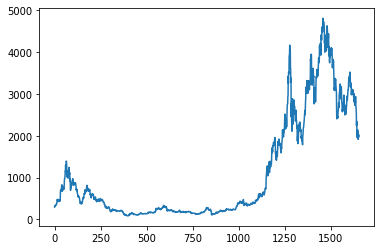

Plot After Scaling


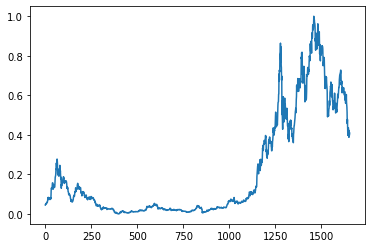

Scaling Delta Close
Plot Before Scaling


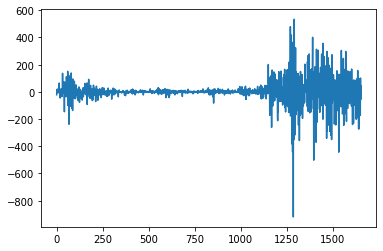

Plot After Scaling


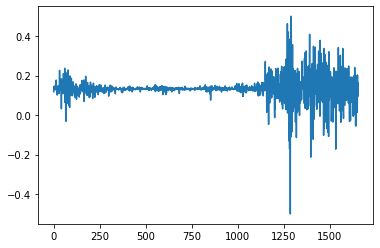

Scaling Delta Pct Close
################################################################
################## Executing for interval  3  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Percentage Close train, test length  1155 494
Close train shape, test sh

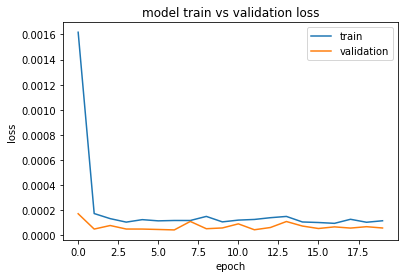

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_146 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_146 (Dense)           (None, 16)                1616      
                                                                 
 dense_147 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


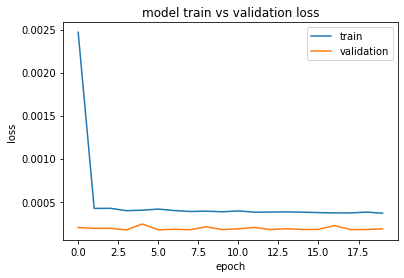

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_147 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_148 (Dense)           (None, 16)                1616      
                                                                 
 dense_149 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


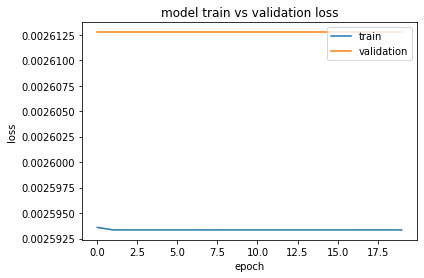

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_148 (LSTM)             (None, 3, 100)            40800     
                                                                 
 dropout_3 (Dropout)         (None, 3, 100)            0         
                                                                 
 lstm_149 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_150 (Dense)           (None, 16)                1616      
                                                                 
 dense_151 (Dense)           (None, 1)                 17        
                                                                 
Tot

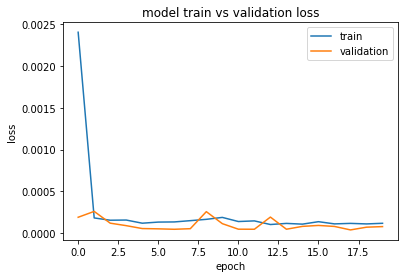

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_150 (LSTM)             (None, 3, 100)            40800     
                                                                 
 dropout_5 (Dropout)         (None, 3, 100)            0         
                                                                 
 lstm_151 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_152 (Dense)           (None, 16)                1616      
                                                                 
 dense_153 (Dense)           (None, 1)                 17        
                                                               

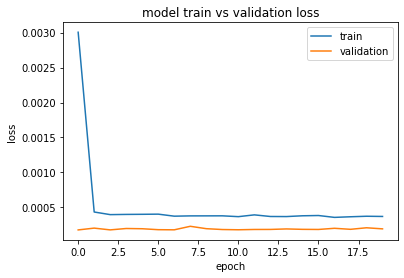

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_152 (LSTM)             (None, 3, 100)            40800     
                                                                 
 dropout_7 (Dropout)         (None, 3, 100)            0         
                                                                 
 lstm_153 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_154 (Dense)           (None, 16)                1616      
                                                                 
 dense_155 (Dense)           (None, 1)                 17        
                                                    

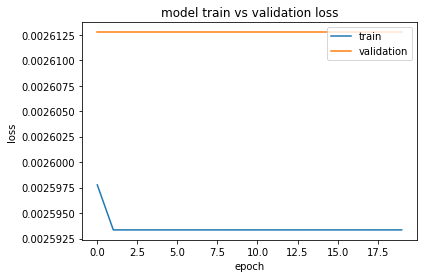

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 1, 8)              32        
                                                                 
 lstm_154 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_156 (Dense)           (None, 16)                1616      
                                                                 
 dense_157 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_________________________________________________________________
Non

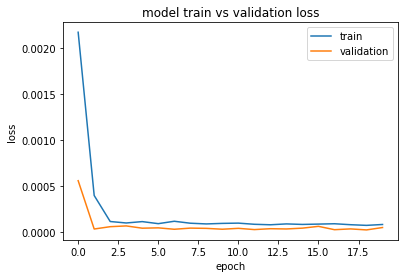

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 1, 8)              32        
                                                                 
 lstm_155 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_158 (Dense)           (None, 16)                1616      
                                                                 
 dense_159 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_______________________________________________________________

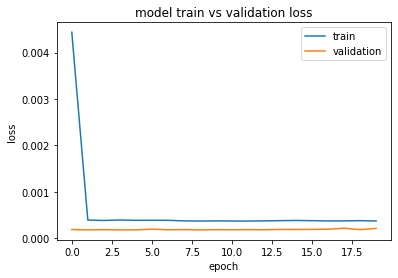

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 1, 8)              32        
                                                                 
 lstm_156 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_160 (Dense)           (None, 16)                1616      
                                                                 
 dense_161 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
____________________________________________________

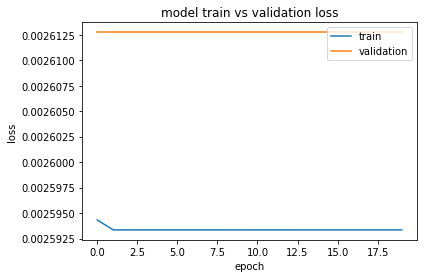

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     293.693359
1  0.053582      337.631012     300.722351
2  0.052678      333.356995     310.950623
3  0.052163      330.924011     321.169830
4  0.052474      332.394012     326.421906
5  0.055693      347.612000     324.402466
6  0.057126      354.385986     330.759644
7  0.059737      366.730011     340.567596
8  0.058398      360.401001     353.667175
9  0.062681      380.652008     358.143524

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1036.632568
1  0.230029    1171.834595   1078.639160
2  0.243080    1233.537598   1111.919678
3  0.242368    1230.172241   1140.794556
4  0.248102    1257.279541   1145.785645
5  0.273487    1377.295898   1169.406860
6  0.274540    1382.274048   1215.529175
7  0.219397    1121.570923   1259.002319
8  0.243709    1236.512207   1205.401489
9  0.242541    1230.990601   1168.773193

RMSE Train = 37.43597492688922
RMSE Test = 285.1496078110151
MAPE Train = 0.07628359043186546
MAPE Test = 0.0859191705931443
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


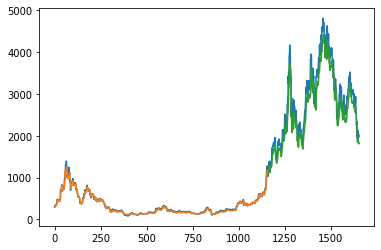

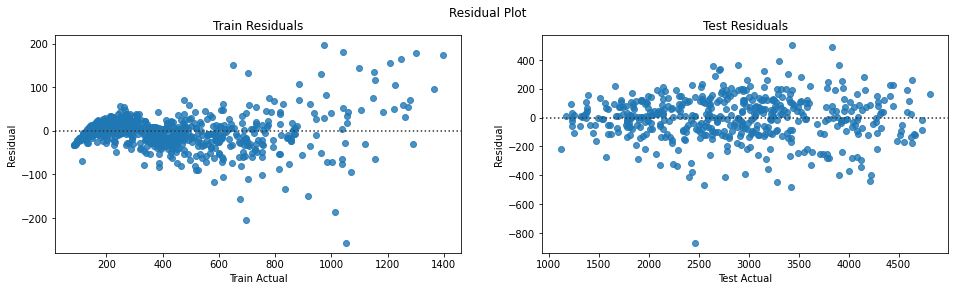

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -1.748188
1  0.146969       20.915009      -0.873511
2  0.129638       -4.274017      -0.292552
3  0.130904       -2.432984      -0.724703
4  0.133590        1.470001      -1.196813
5  0.143049       15.217988      -1.542919
6  0.137239        6.773986      -0.710323
7  0.141072       12.344025      -0.559804
8  0.128224       -6.329010      -0.251771
9  0.146512       20.251007      -1.156227

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -2.934839
1  0.100503     -46.618408      4.463820
2  0.175033      61.703003      1.257077
3  0.130263      -3.365357      1.851117
4  0.151229      27.107300     -0.641149
5  0.215155     120.016357      1.170079
6  0.136004       4.978150      4.964907
7 -0.046796    -260.703125      3.324555
8  0.211663     114.941284     -7.133143
9  0.128779      -5.521606     -2.472605

RMSE Train = 25.20509609193032
RMSE Test = 142.2963989995795
MAPE Train = 2.699700314882997
MAPE Test = 1.0536980577168777
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


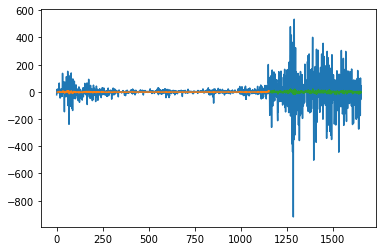

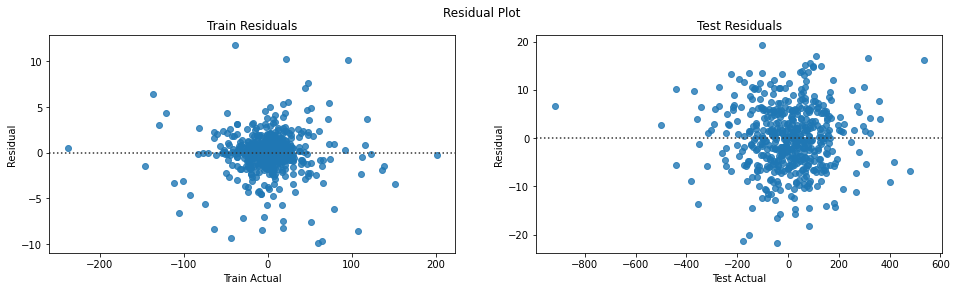

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606            0.0
1  0.066037        0.066037            0.0
2 -0.012659       -0.012659            0.0
3 -0.007298       -0.007298            0.0
4  0.004442        0.004442            0.0
5  0.045783        0.045783            0.0
6  0.019487        0.019487            0.0
7  0.034832        0.034832            0.0
8 -0.017258       -0.017258            0.0
9  0.056190        0.056190            0.0

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572           0.0
1 -0.038260      -0.038260           0.0
2  0.052655       0.052655           0.0
3 -0.002728      -0.002728           0.0
4  0.022035       0.022035           0.0
5  0.095457       0.095457           0.0
6  0.003614       0.003614           0.0
7 -0.188605      -0.188605           0.0
8  0.102482       0.102482           0.0
9 -0.004465      -0.004465           0.0

RMSE Train = 0.050987869496074166
RMSE Test = 0.050825255223530895
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


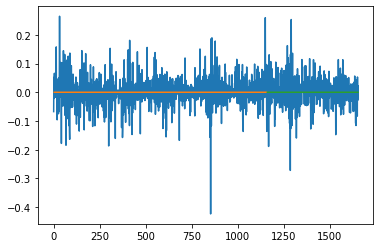

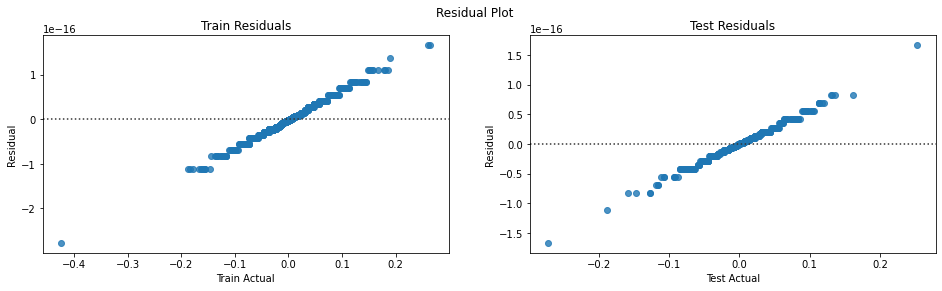

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     332.143890
1  0.053582      337.631012     338.517914
2  0.052678      333.356995     342.294983
3  0.052163      330.924011     352.152649
4  0.052474      332.394012     359.550812
5  0.055693      347.612000     357.150269
6  0.057126      354.385986     359.238800
7  0.059737      366.730011     365.814301
8  0.058398      360.401001     376.725830
9  0.062681      380.652008     382.552734

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1030.703979
1  0.230029    1171.834595   1060.409180
2  0.243080    1233.537598   1106.559570
3  0.242368    1230.172241   1137.011597
4  0.248102    1257.279541   1137.785889
5  0.273487    1377.295898   1164.451294
6  0.274540    1382.274048   1195.554565
7  0.219397    1121.570923   1239.723022
8  0.243709    1236.512207   1228.771362
9  0.242541    1230.990601   1179.140991

RMSE Train = 45.597672736861846
RMSE Test = 334.95430026225085
MAPE Train = 0.13828310447385173
MAPE Test = 0.10064626199895282
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


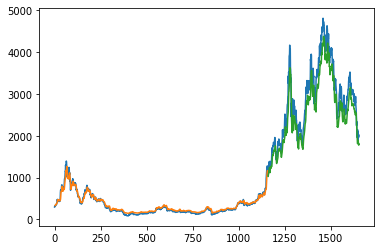

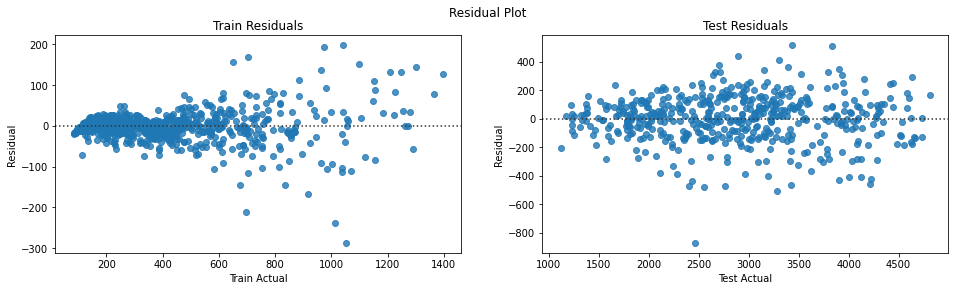

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -2.141269
1  0.146969       20.915009      -2.003138
2  0.129638       -4.274017      -1.985293
3  0.130904       -2.432984      -1.937581
4  0.133590        1.470001      -2.005694
5  0.143049       15.217988      -2.114501
6  0.137239        6.773986      -2.026420
7  0.141072       12.344025      -1.963635
8  0.128224       -6.329010      -1.914386
9  0.146512       20.251007      -2.005088

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -2.836081
1  0.100503     -46.618408     -1.503503
2  0.175033      61.703003     -1.340444
3  0.130263      -3.365357     -1.629267
4  0.151229      27.107300     -2.008098
5  0.215155     120.016357     -1.665023
6  0.136004       4.978150     -1.468526
7 -0.046796    -260.703125     -1.273415
8  0.211663     114.941284     -2.133213
9  0.128779      -5.521606     -2.580935

RMSE Train = 25.359101876951467
RMSE Test = 141.7597199207099
MAPE Train = 3.302765715626034
MAPE Test = 1.0040200778969848
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


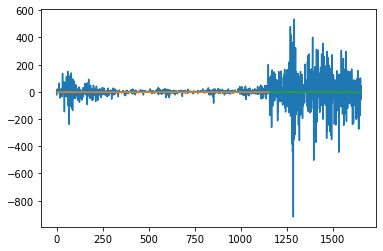

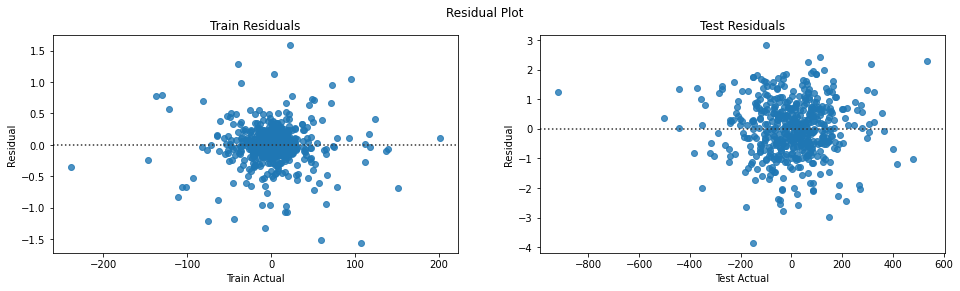

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606            0.0
1  0.066037        0.066037            0.0
2 -0.012659       -0.012659            0.0
3 -0.007298       -0.007298            0.0
4  0.004442        0.004442            0.0
5  0.045783        0.045783            0.0
6  0.019487        0.019487            0.0
7  0.034832        0.034832            0.0
8 -0.017258       -0.017258            0.0
9  0.056190        0.056190            0.0

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572           0.0
1 -0.038260      -0.038260           0.0
2  0.052655       0.052655           0.0
3 -0.002728      -0.002728           0.0
4  0.022035       0.022035           0.0
5  0.095457       0.095457           0.0
6  0.003614       0.003614           0.0
7 -0.188605      -0.188605           0.0
8  0.102482       0.102482           0.0
9 -0.004465      -0.004465           0.0

RMSE Train = 0.050987869496074166
RMSE Test = 0.050825255223530895
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


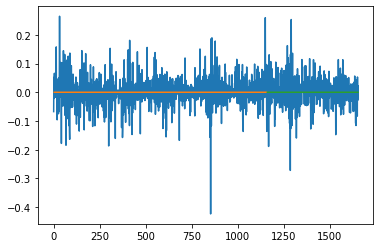

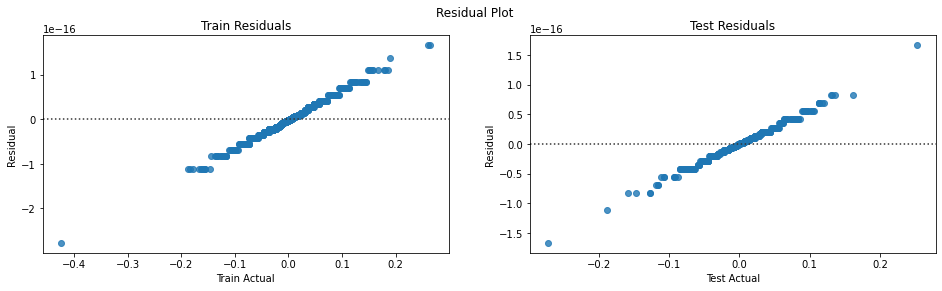

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     287.427246
1  0.053582      337.631012     292.298981
2  0.052678      333.356995     306.550140
3  0.052163      330.924011     313.650696
4  0.052474      332.394012     313.770905
5  0.055693      347.612000     313.020386
6  0.057126      354.385986     321.802246
7  0.059737      366.730011     331.714874
8  0.058398      360.401001     343.584686
9  0.062681      380.652008     345.796906

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1058.045410
1  0.230029    1171.834595   1121.821899
2  0.243080    1233.537598   1141.711548
3  0.242368    1230.172241   1166.027954
4  0.248102    1257.279541   1179.279297
5  0.273487    1377.295898   1198.848389
6  0.274540    1382.274048   1262.423950
7  0.219397    1121.570923   1309.369751
8  0.243709    1236.512207   1203.035767
9  0.242541    1230.990601   1170.917969

RMSE Train = 35.90099688797172
RMSE Test = 172.2634159614299
MAPE Train = 0.08880853536812144
MAPE Test = 0.04975345942504885
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


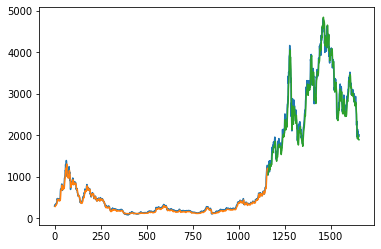

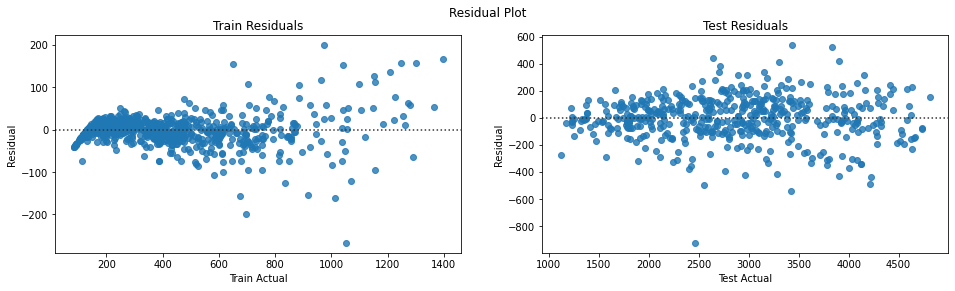

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -5.217700
1  0.146969       20.915009      -4.853401
2  0.129638       -4.274017      -4.647071
3  0.130904       -2.432984      -4.733571
4  0.133590        1.470001      -4.906050
5  0.143049       15.217988      -5.184434
6  0.137239        6.773986      -4.838414
7  0.141072       12.344025      -4.610622
8  0.128224       -6.329010      -4.493087
9  0.146512       20.251007      -4.922726

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -7.534996
1  0.100503     -46.618408     -2.404060
2  0.175033      61.703003     -4.177583
3  0.130263      -3.365357     -3.735382
4  0.151229      27.107300     -4.809762
5  0.215155     120.016357     -3.754094
6  0.136004       4.978150     -2.554730
7 -0.046796    -260.703125     -2.984911
8  0.211663     114.941284     -9.190183
9  0.128779      -5.521606     -8.606040

RMSE Train = 25.840038443368893
RMSE Test = 142.01986830269166
MAPE Train = 7.188315464077086
MAPE Test = 1.0357947585607685
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


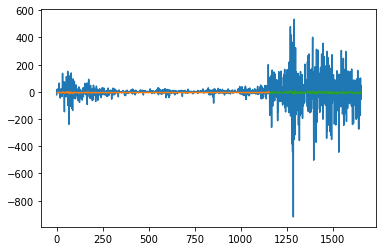

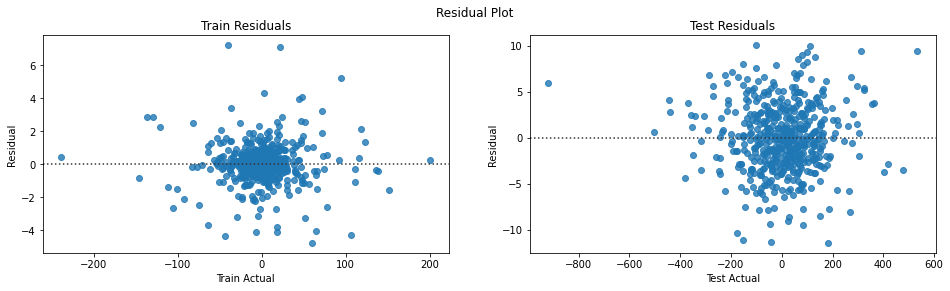

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606            0.0
1  0.066037        0.066037            0.0
2 -0.012659       -0.012659            0.0
3 -0.007298       -0.007298            0.0
4  0.004442        0.004442            0.0
5  0.045783        0.045783            0.0
6  0.019487        0.019487            0.0
7  0.034832        0.034832            0.0
8 -0.017258       -0.017258            0.0
9  0.056190        0.056190            0.0

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572           0.0
1 -0.038260      -0.038260           0.0
2  0.052655       0.052655           0.0
3 -0.002728      -0.002728           0.0
4  0.022035       0.022035           0.0
5  0.095457       0.095457           0.0
6  0.003614       0.003614           0.0
7 -0.188605      -0.188605           0.0
8  0.102482       0.102482           0.0
9 -0.004465      -0.004465           0.0

RMSE Train = 0.050987869496074166
RMSE Test = 0.050825255223530895
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


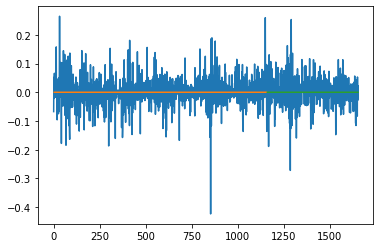

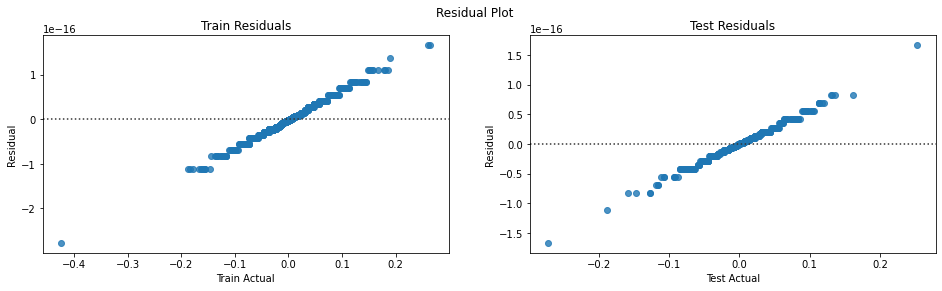

----------------------------


model  interval                            target  rmse_train  \
0          LSTM       3.0                             Close   37.435975   
1          LSTM       3.0             Change in Close Price   25.205096   
2          LSTM       3.0  Percentage Change in Close Price    0.050988   
3  Stacked LSTM       3.0                             Close   45.597673   
4  Stacked LSTM       3.0             Change in Close Price   25.359102   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6      CNN-LSTM       3.0                             Close   35.900997   
7      CNN-LSTM       3.0             Change in Close Price   25.840038   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   

    rmse_test  mape_train  mape_test  
0  285.149608    0.076284   0.085919  
1  142.296399    2.699700   1.053698  
2    0.050825    1.000000   1.000000  
3  334.954300    0.138283   0.100646  
4  141.759720    3.302766   1.004020  
5    0.050825    1.000000   1.000000  
6  172.263416    0.088809   0.049753  
7  142.019868    7.188315   1.035795  
8    0.050825    1.000000   1.000000

################################################################
################## Executing for interval  5  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Percentage Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,

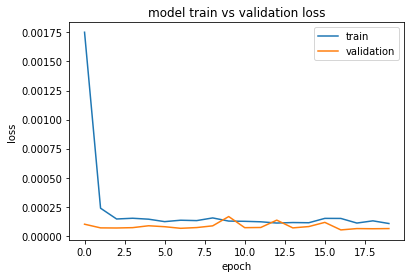

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_158 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_164 (Dense)           (None, 16)                1616      
                                                                 
 dense_165 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


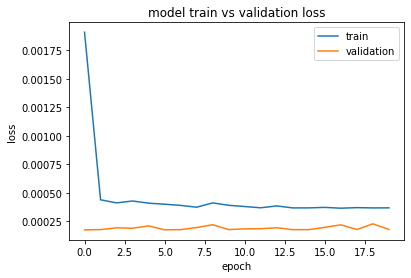

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_159 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_166 (Dense)           (None, 16)                1616      
                                                                 
 dense_167 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


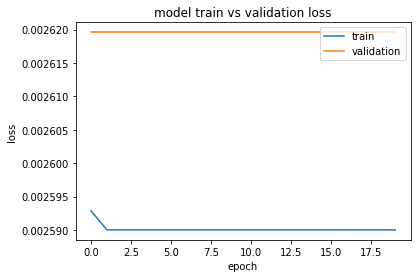

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_160 (LSTM)             (None, 5, 100)            40800     
                                                                 
 dropout_15 (Dropout)        (None, 5, 100)            0         
                                                                 
 lstm_161 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_168 (Dense)           (None, 16)                1616      
                                                                 
 dense_169 (Dense)           (None, 1)                 17        
                                                                 
Tot

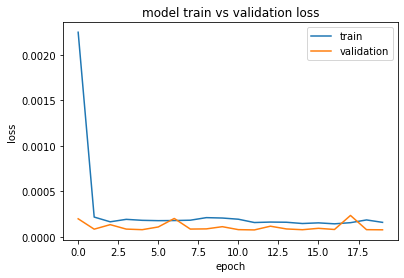

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_162 (LSTM)             (None, 5, 100)            40800     
                                                                 
 dropout_17 (Dropout)        (None, 5, 100)            0         
                                                                 
 lstm_163 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                                 
 dense_170 (Dense)           (None, 16)                1616      
                                                                 
 dense_171 (Dense)           (None, 1)                 17        
                                                               

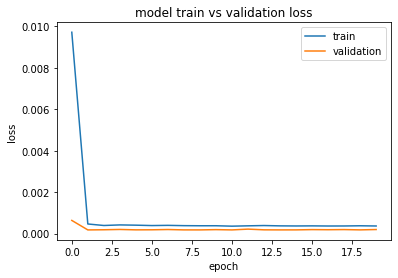

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_164 (LSTM)             (None, 5, 100)            40800     
                                                                 
 dropout_19 (Dropout)        (None, 5, 100)            0         
                                                                 
 lstm_165 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                                 
 dense_172 (Dense)           (None, 16)                1616      
                                                                 
 dense_173 (Dense)           (None, 1)                 17        
                                                    

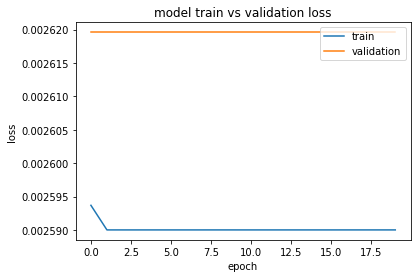

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_39 (Conv1D)          (None, 3, 8)              32        
                                                                 
 lstm_166 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_174 (Dense)           (None, 16)                1616      
                                                                 
 dense_175 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_________________________________________________________________
Non

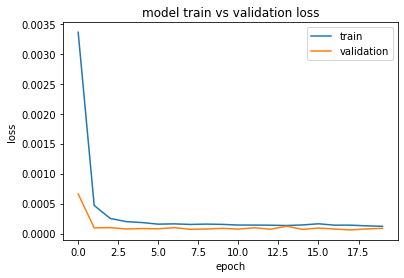

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_40 (Conv1D)          (None, 3, 8)              32        
                                                                 
 lstm_167 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_22 (Dropout)        (None, 100)               0         
                                                                 
 dense_176 (Dense)           (None, 16)                1616      
                                                                 
 dense_177 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_______________________________________________________________

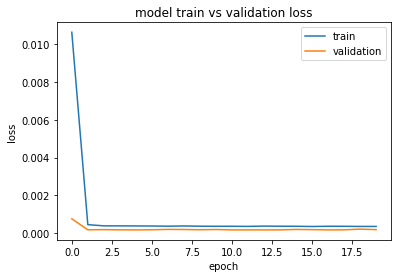

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_41 (Conv1D)          (None, 3, 8)              32        
                                                                 
 lstm_168 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_178 (Dense)           (None, 16)                1616      
                                                                 
 dense_179 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
____________________________________________________

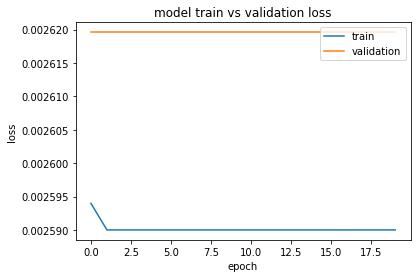

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     328.632965
1  0.052163      330.924011     336.112396
2  0.052474      332.394012     339.542053
3  0.055693      347.612000     343.395935
4  0.057126      354.385986     350.289429
5  0.059737      366.730011     356.432190
6  0.058398      360.401001     366.263397
7  0.062681      380.652008     372.141846
8  0.068924      410.165985     383.285645
9  0.082619      474.911011     400.777649

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1090.789429
1  0.242368    1230.172241   1117.740234
2  0.248102    1257.279541   1142.329712
3  0.273487    1377.295898   1161.936157
4  0.274540    1382.274048   1198.500000
5  0.219397    1121.570923   1232.896851
6  0.243709    1236.512207   1181.328125
7  0.242541    1230.990601   1184.992554
8  0.276515    1391.609375   1182.670654
9  0.262302    1324.414795   1207.570435

RMSE Train = 38.39139453403266
RMSE Test = 314.3456617089941
MAPE Train = 0.06726256578703448
MAPE Test = 0.09455468275352864
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


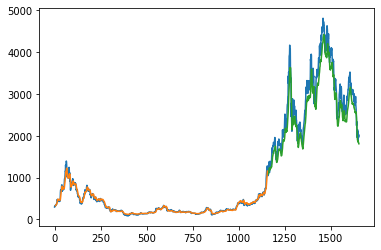

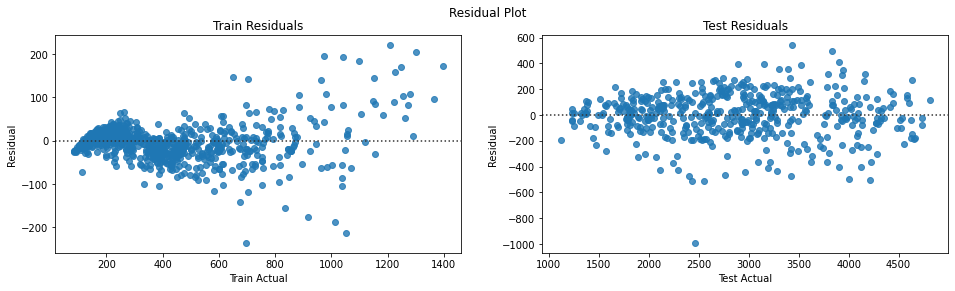

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017       2.315105
1  0.130904       -2.432984       2.120253
2  0.133590        1.470001       1.762322
3  0.143049       15.217988       1.828550
4  0.137239        6.773986       2.180309
5  0.141072       12.344025       2.076462
6  0.128224       -6.329010       2.354326
7  0.146512       20.251007       1.966811
8  0.152885       29.513977       2.499106
9  0.177126       64.745026       3.116688

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003      2.030635
1  0.130263      -3.365357      4.708354
2  0.151229      27.107300      4.068985
3  0.215155     120.016357      3.697279
4  0.136004       4.978150      6.386519
5 -0.046796    -260.703125      5.580193
6  0.211663     114.941284      0.548188
7  0.128779      -5.521606      4.541202
8  0.243091     160.618774      3.285095
9  0.086346     -67.194580      7.137900

RMSE Train = 25.163547573549533
RMSE Test = 142.29967038625904
MAPE Train = 2.583434124025215
MAPE Test = 1.0596013153733328
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


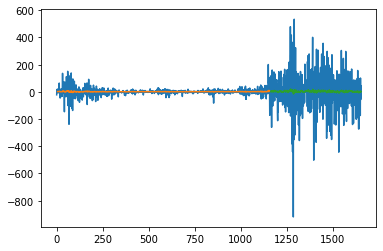

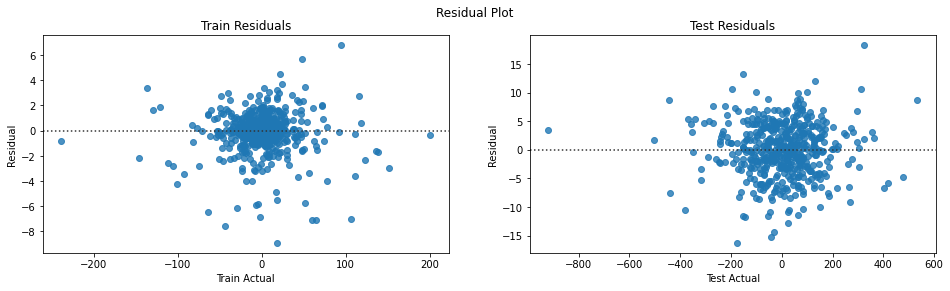

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659            0.0
1 -0.007298       -0.007298            0.0
2  0.004442        0.004442            0.0
3  0.045783        0.045783            0.0
4  0.019487        0.019487            0.0
5  0.034832        0.034832            0.0
6 -0.017258       -0.017258            0.0
7  0.056190        0.056190            0.0
8  0.077535        0.077535            0.0
9  0.157851        0.157851            0.0

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655           0.0
1 -0.002728      -0.002728           0.0
2  0.022035       0.022035           0.0
3  0.095457       0.095457           0.0
4  0.003614       0.003614           0.0
5 -0.188605      -0.188605           0.0
6  0.102482       0.102482           0.0
7 -0.004465      -0.004465           0.0
8  0.130479       0.130479           0.0
9 -0.048286      -0.048286           0.0

RMSE Train = 0.050988042345332704
RMSE Test = 0.05077894844694595
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


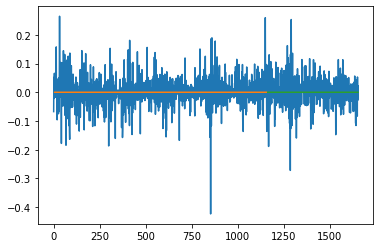

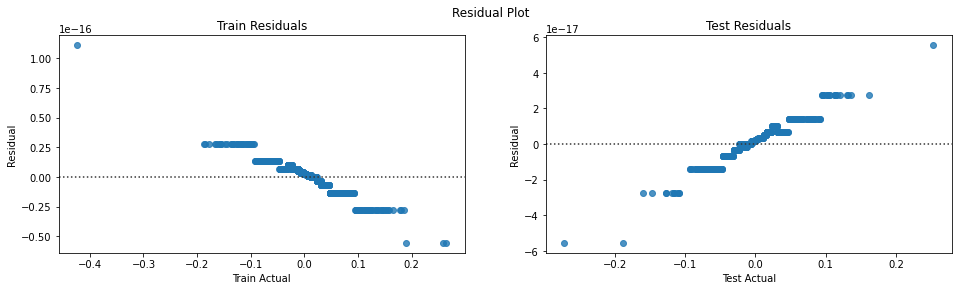

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     333.163239
1  0.052163      330.924011     340.691559
2  0.052474      332.394012     344.969116
3  0.055693      347.612000     350.359680
4  0.057126      354.385986     355.502472
5  0.059737      366.730011     358.364227
6  0.058398      360.401001     364.803345
7  0.062681      380.652008     371.878693
8  0.068924      410.165985     380.946838
9  0.082619      474.911011     391.872803

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1095.008789
1  0.242368    1230.172241   1118.972168
2  0.248102    1257.279541   1152.805664
3  0.273487    1377.295898   1173.759644
4  0.274540    1382.274048   1198.465698
5  0.219397    1121.570923   1235.338989
6  0.243709    1236.512207   1225.639526
7  0.242541    1230.990601   1217.820435
8  0.276515    1391.609375   1214.238525
9  0.262302    1324.414795   1212.522461

RMSE Train = 45.30051118718229
RMSE Test = 333.5342124648329
MAPE Train = 0.10824099639083713
MAPE Test = 0.09545636161073215
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


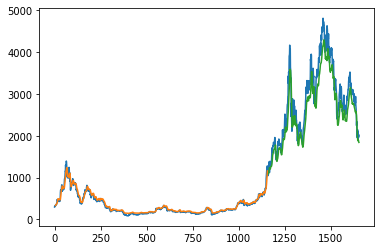

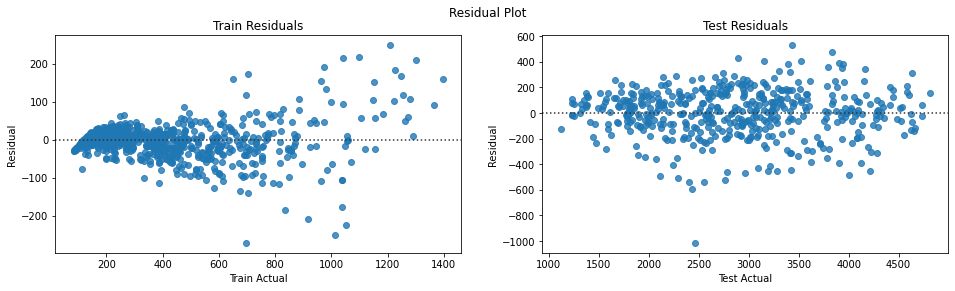

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -3.062877
1  0.130904       -2.432984      -2.953746
2  0.133590        1.470001      -3.036347
3  0.143049       15.217988      -3.023699
4  0.137239        6.773986      -3.015664
5  0.141072       12.344025      -3.053499
6  0.128224       -6.329010      -2.965939
7  0.146512       20.251007      -2.967346
8  0.152885       29.513977      -2.916625
9  0.177126       64.745026      -2.845502

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -3.197478
1  0.130263      -3.365357     -2.309763
2  0.151229      27.107300     -2.146662
3  0.215155     120.016357     -2.500067
4  0.136004       4.978150     -2.349765
5 -0.046796    -260.703125     -1.960300
6  0.211663     114.941284     -2.948526
7  0.128779      -5.521606     -2.829021
8  0.243091     160.618774     -2.933799
9  0.086346     -67.194580     -2.679563

RMSE Train = 25.50948466137003
RMSE Test = 142.02751664507616
MAPE Train = 4.60333158964726
MAPE Test = 1.0094822135055277
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


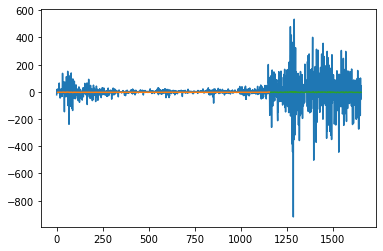

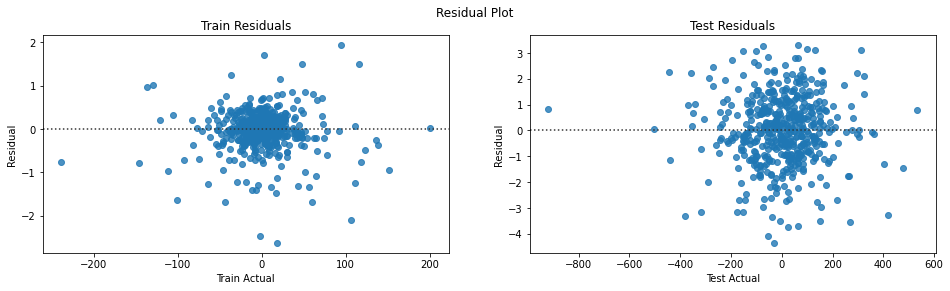

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659            0.0
1 -0.007298       -0.007298            0.0
2  0.004442        0.004442            0.0
3  0.045783        0.045783            0.0
4  0.019487        0.019487            0.0
5  0.034832        0.034832            0.0
6 -0.017258       -0.017258            0.0
7  0.056190        0.056190            0.0
8  0.077535        0.077535            0.0
9  0.157851        0.157851            0.0

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655           0.0
1 -0.002728      -0.002728           0.0
2  0.022035       0.022035           0.0
3  0.095457       0.095457           0.0
4  0.003614       0.003614           0.0
5 -0.188605      -0.188605           0.0
6  0.102482       0.102482           0.0
7 -0.004465      -0.004465           0.0
8  0.130479       0.130479           0.0
9 -0.048286      -0.048286           0.0

RMSE Train = 0.050988042345332704
RMSE Test = 0.05077894844694595
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


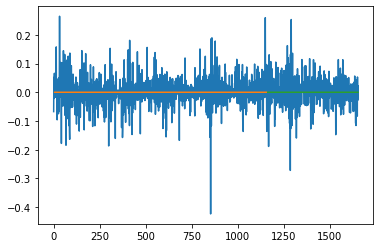

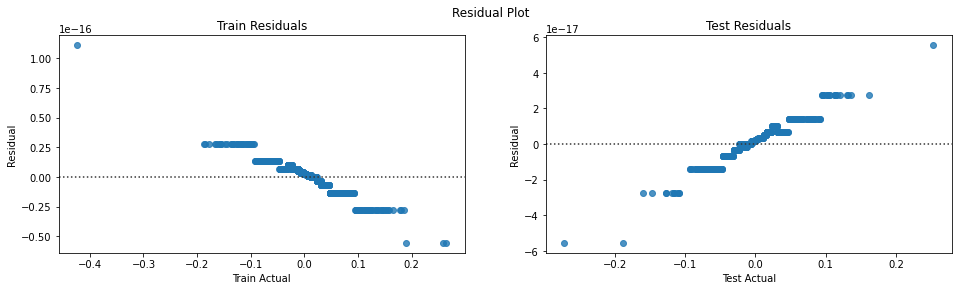

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     304.298706
1  0.052163      330.924011     310.405365
2  0.052474      332.394012     316.480682
3  0.055693      347.612000     319.489502
4  0.057126      354.385986     321.675659
5  0.059737      366.730011     324.937500
6  0.058398      360.401001     331.892853
7  0.062681      380.652008     338.799988
8  0.068924      410.165985     345.986298
9  0.082619      474.911011     355.060364

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1059.476074
1  0.242368    1230.172241   1091.620117
2  0.248102    1257.279541   1112.072754
3  0.273487    1377.295898   1131.348511
4  0.274540    1382.274048   1154.753906
5  0.219397    1121.570923   1190.332397
6  0.243709    1236.512207   1200.183228
7  0.242541    1230.990601   1186.834351
8  0.276515    1391.609375   1146.770996
9  0.262302    1324.414795   1152.969727

RMSE Train = 45.25309555121413
RMSE Test = 277.1200510047432
MAPE Train = 0.07894780518789923
MAPE Test = 0.08186791700572206
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


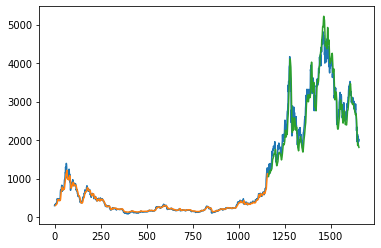

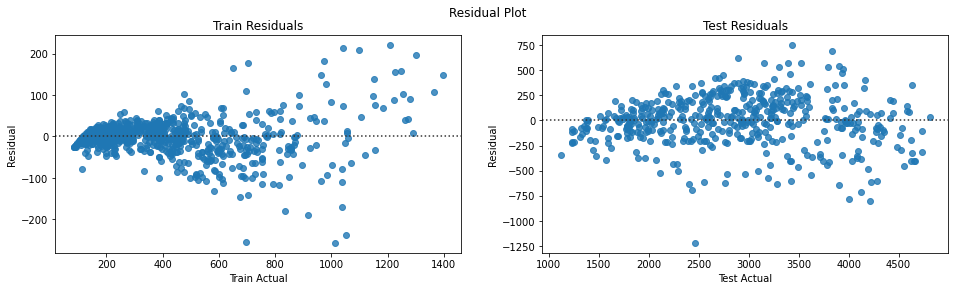

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -2.276000
1  0.130904       -2.432984      -2.331248
2  0.133590        1.470001      -2.593085
3  0.143049       15.217988      -2.581564
4  0.137239        6.773986      -2.384611
5  0.141072       12.344025      -2.341925
6  0.128224       -6.329010      -2.345607
7  0.146512       20.251007      -2.469249
8  0.152885       29.513977      -2.375190
9  0.177126       64.745026      -2.002662

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -1.265163
1  0.130263      -3.365357     -1.765145
2  0.151229      27.107300     -1.434177
3  0.215155     120.016357     -1.827237
4  0.136004       4.978150     -0.818198
5 -0.046796    -260.703125     -0.684702
6  0.211663     114.941284     -2.715450
7  0.128779      -5.521606     -2.136808
8  0.243091     160.618774     -0.559306
9  0.086346     -67.194580      0.473253

RMSE Train = 25.404850584326162
RMSE Test = 142.11126337836026
MAPE Train = 3.9374079230786605
MAPE Test = 1.0058281133623255
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


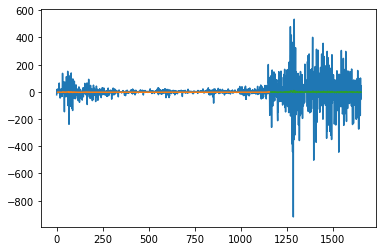

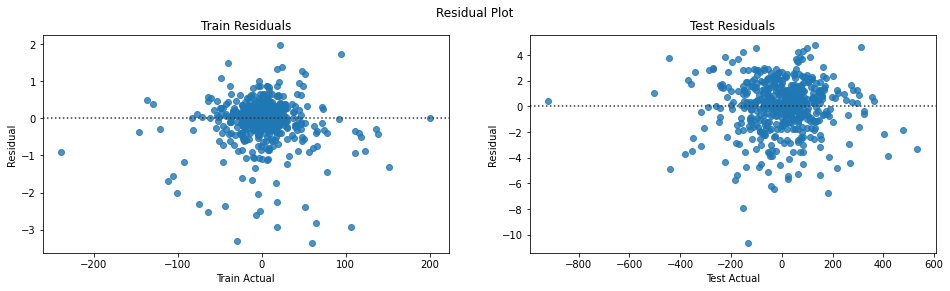

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659            0.0
1 -0.007298       -0.007298            0.0
2  0.004442        0.004442            0.0
3  0.045783        0.045783            0.0
4  0.019487        0.019487            0.0
5  0.034832        0.034832            0.0
6 -0.017258       -0.017258            0.0
7  0.056190        0.056190            0.0
8  0.077535        0.077535            0.0
9  0.157851        0.157851            0.0

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655           0.0
1 -0.002728      -0.002728           0.0
2  0.022035       0.022035           0.0
3  0.095457       0.095457           0.0
4  0.003614       0.003614           0.0
5 -0.188605      -0.188605           0.0
6  0.102482       0.102482           0.0
7 -0.004465      -0.004465           0.0
8  0.130479       0.130479           0.0
9 -0.048286      -0.048286           0.0

RMSE Train = 0.050988042345332704
RMSE Test = 0.05077894844694595
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


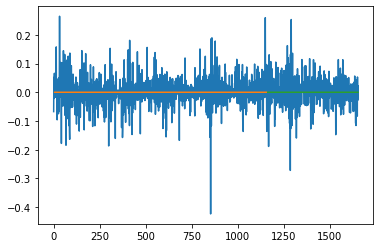

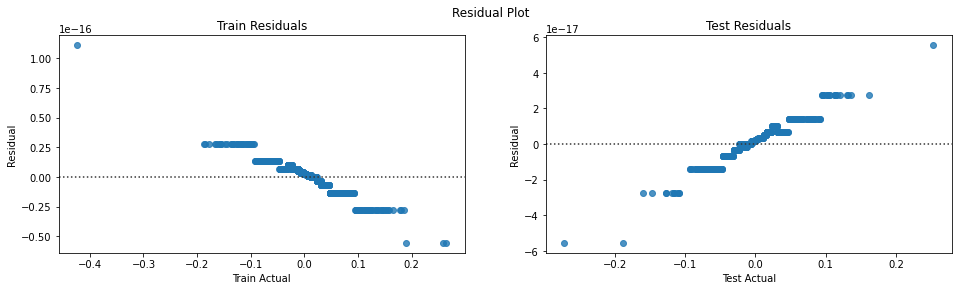

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   37.435975   
1           LSTM       3.0             Change in Close Price   25.205096   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
3   Stacked LSTM       3.0                             Close   45.597673   
4   Stacked LSTM       3.0             Change in Close Price   25.359102   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6       CNN-LSTM       3.0                             Close   35.900997   
7       CNN-LSTM       3.0             Change in Close Price   25.840038   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
9           LSTM       5.0                             Close   38.391395   
10          LSTM       5.0             Change in Close Price   25.163548   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
12  Stacked LSTM       5.0                             Close   45.300511   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
15      CNN-LSTM       5.0                             Close   45.253096   
16      CNN-LSTM       5.0             Change in Close Price   25.404851   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   

     rmse_test  mape_train  mape_test  
0   285.149608    0.076284   0.085919  
1   142.296399    2.699700   1.053698  
2     0.050825    1.000000   1.000000  
3   334.954300    0.138283   0.100646  
4   141.759720    3.302766   1.004020  
5     0.050825    1.000000   1.000000  
6   172.263416    0.088809   0.049753  
7   142.019868    7.188315   1.035795  
8     0.050825    1.000000   1.000000  
9   314.345662    0.067263   0.094555  
10  142.299670    2.583434   1.059601  
11    0.050779    1.000000   1.000000  
12  333.534212    0.108241   0.095456  
13  142.027517    4.603332   1.009482  
14    0.050779    1.000000   1.000000  
15  277.120051    0.078948   0.081868  
16  142.111263    3.937408   1.005828  
17    0.050779    1.000000   1.000000

################################################################
################## Executing for interval  10  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Percentage Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) 

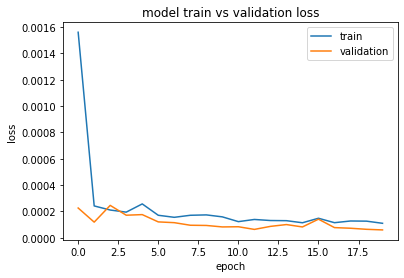

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_170 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_182 (Dense)           (None, 16)                1616      
                                                                 
 dense_183 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


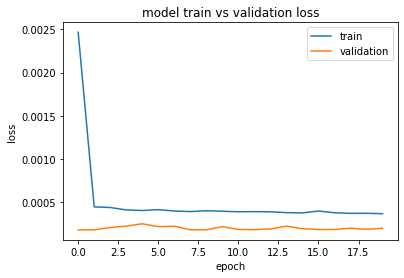

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_171 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_26 (Dropout)        (None, 100)               0         
                                                                 
 dense_184 (Dense)           (None, 16)                1616      
                                                                 
 dense_185 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


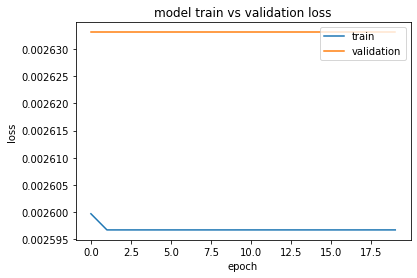

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_172 (LSTM)             (None, 10, 100)           40800     
                                                                 
 dropout_27 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_173 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_28 (Dropout)        (None, 100)               0         
                                                                 
 dense_186 (Dense)           (None, 16)                1616      
                                                                 
 dense_187 (Dense)           (None, 1)                 17        
                                                                 
Tot

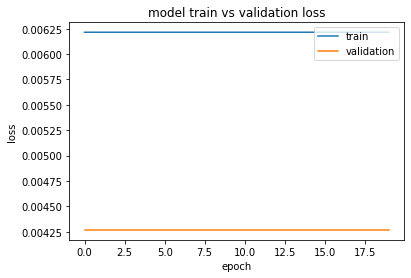

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_174 (LSTM)             (None, 10, 100)           40800     
                                                                 
 dropout_29 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_175 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_30 (Dropout)        (None, 100)               0         
                                                                 
 dense_188 (Dense)           (None, 16)                1616      
                                                                 
 dense_189 (Dense)           (None, 1)                 17        
                                                               

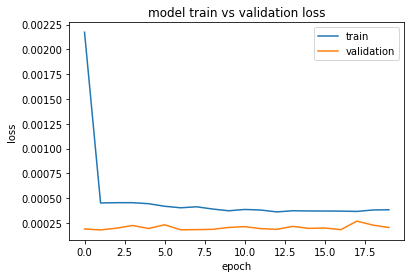

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_176 (LSTM)             (None, 10, 100)           40800     
                                                                 
 dropout_31 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_177 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_32 (Dropout)        (None, 100)               0         
                                                                 
 dense_190 (Dense)           (None, 16)                1616      
                                                                 
 dense_191 (Dense)           (None, 1)                 17        
                                                    

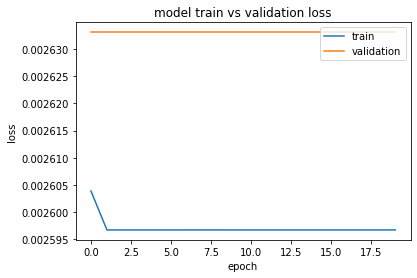

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_42 (Conv1D)          (None, 8, 8)              32        
                                                                 
 lstm_178 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_33 (Dropout)        (None, 100)               0         
                                                                 
 dense_192 (Dense)           (None, 16)                1616      
                                                                 
 dense_193 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_________________________________________________________________
Non

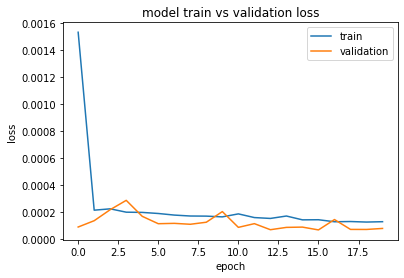

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_43 (Conv1D)          (None, 8, 8)              32        
                                                                 
 lstm_179 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_34 (Dropout)        (None, 100)               0         
                                                                 
 dense_194 (Dense)           (None, 16)                1616      
                                                                 
 dense_195 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_______________________________________________________________

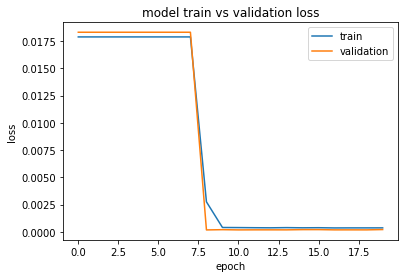

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_44 (Conv1D)          (None, 8, 8)              32        
                                                                 
 lstm_180 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_35 (Dropout)        (None, 100)               0         
                                                                 
 dense_196 (Dense)           (None, 16)                1616      
                                                                 
 dense_197 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
____________________________________________________

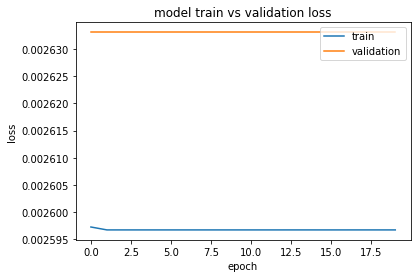

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     362.730255
1  0.058398      360.401001     372.578857
2  0.062681      380.652008     377.897675
3  0.068924      410.165985     387.978943
4  0.082619      474.911011     405.060638
5  0.080792      466.276001     437.770813
6  0.081861      471.329987     461.233551
7  0.083770      480.355011     479.939972
8  0.082194      472.902008     495.674652
9  0.072595      427.523010     504.030853

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1286.396729
1  0.243709    1236.512207   1230.310181
2  0.242541    1230.990601   1221.331177
3  0.276515    1391.609375   1216.099609
4  0.262302    1324.414795   1263.423340
5  0.269207    1357.058105   1280.509766
6  0.247236    1253.187134   1298.918091
7  0.264011    1332.492188   1277.904907
8  0.274593    1382.522827   1286.244995
9  0.273238    1376.115479   1308.876709

RMSE Train = 40.5750846585794
RMSE Test = 302.6411282338882
MAPE Train = 0.08764980461170614
MAPE Test = 0.0839760430469213
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


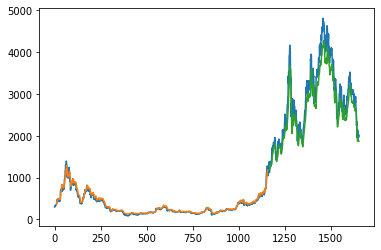

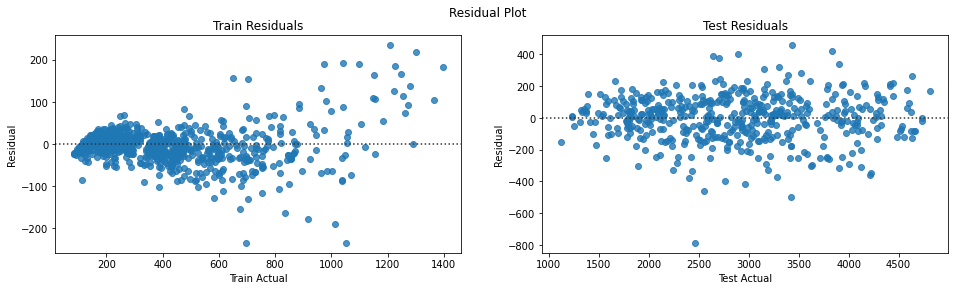

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      -2.256248
1  0.128224       -6.329010      -2.096807
2  0.146512       20.251007      -2.467256
3  0.152885       29.513977      -2.054791
4  0.177126       64.745026      -1.530358
5  0.126637       -8.635010      -0.271068
6  0.136056        5.053986      -1.245563
7  0.138788        9.025024      -1.597972
8  0.127450       -7.453003      -1.746585
9  0.101356      -45.378998      -2.273466

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     -0.221342
1  0.211663     114.941284     -3.206292
2  0.128779      -5.521606     -0.736420
3  0.243091     160.618774     -1.653523
4  0.086346     -67.194580      0.888880
5  0.155038      32.643310     -1.577766
6  0.061111    -103.870971     -1.269711
7  0.187144      79.305054     -3.576265
8  0.167002      50.030639     -1.495229
9  0.128170      -6.407348     -0.745148

RMSE Train = 25.448771662595945
RMSE Test = 142.67494000238
MAPE Train = 4.18404718607456
MAPE Test = 1.0167414819207994
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


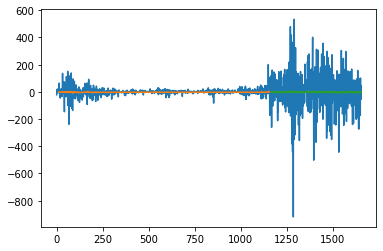

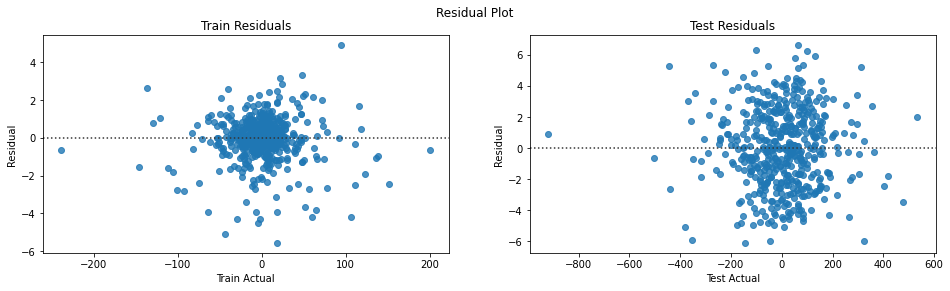

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832            0.0
1 -0.017258       -0.017258            0.0
2  0.056190        0.056190            0.0
3  0.077535        0.077535            0.0
4  0.157851        0.157851            0.0
5 -0.018182       -0.018182            0.0
6  0.010839        0.010839            0.0
7  0.019148        0.019148            0.0
8 -0.015516       -0.015516            0.0
9 -0.095959       -0.095959            0.0

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605           0.0
1  0.102482       0.102482           0.0
2 -0.004465      -0.004465           0.0
3  0.130479       0.130479           0.0
4 -0.048286      -0.048286           0.0
5  0.024647       0.024647           0.0
6 -0.076541      -0.076541           0.0
7  0.063283       0.063283           0.0
8  0.037547       0.037547           0.0
9 -0.004635      -0.004635           0.0

RMSE Train = 0.05107586243829624
RMSE Test = 0.050789093609195264
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


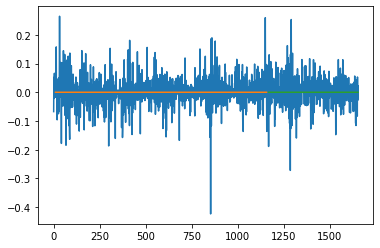

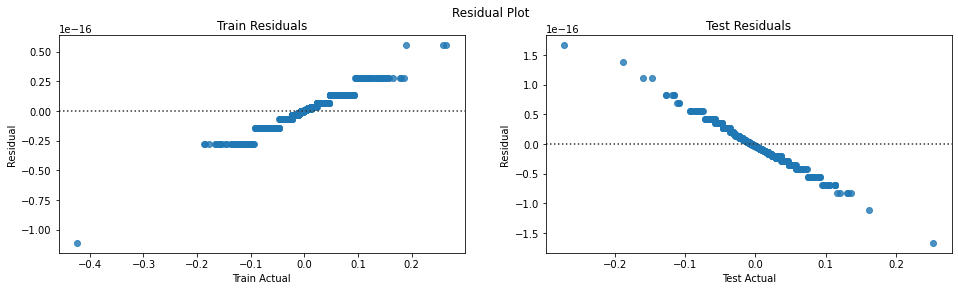

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011      84.308289
1  0.058398      360.401001      84.308289
2  0.062681      380.652008      84.308289
3  0.068924      410.165985      84.308289
4  0.082619      474.911011      84.308289
5  0.080792      466.276001      84.308289
6  0.081861      471.329987      84.308289
7  0.083770      480.355011      84.308289
8  0.082194      472.902008      84.308289
9  0.072595      427.523010      84.308289

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923     84.308289
1  0.243709    1236.512207     84.308289
2  0.242541    1230.990601     84.308289
3  0.276515    1391.609375     84.308289
4  0.262302    1324.414795     84.308289
5  0.269207    1357.058105     84.308289
6  0.247236    1253.187134     84.308289
7  0.264011    1332.492188     84.308289
8  0.274593    1382.522827     84.308289
9  0.273238    1376.115479     84.308289

RMSE Train = 352.90532335009937
RMSE Test = 2913.7249571633297
MAPE Train = 0.6396050669251427
MAPE Test = 0.9677079299854708
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


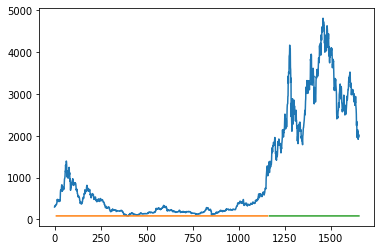

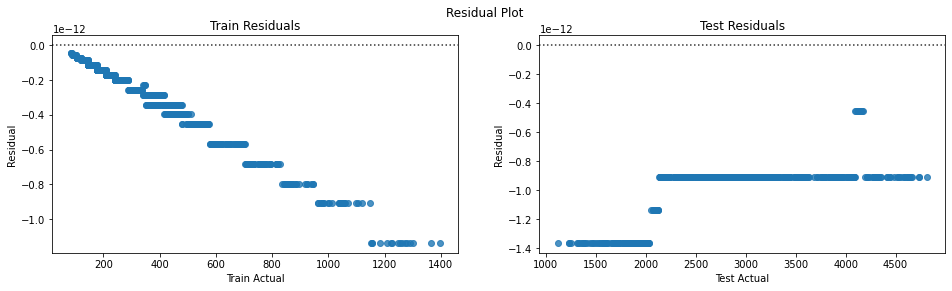

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      -3.650052
1  0.128224       -6.329010      -3.599742
2  0.146512       20.251007      -3.631925
3  0.152885       29.513977      -3.591556
4  0.177126       64.745026      -3.510275
5  0.126637       -8.635010      -3.309641
6  0.136056        5.053986      -3.276029
7  0.138788        9.025024      -3.296625
8  0.127450       -7.453003      -3.331104
9  0.101356      -45.378998      -3.425595

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     -2.929295
1  0.211663     114.941284     -3.085184
2  0.128779      -5.521606     -2.911146
3  0.243091     160.618774     -3.003861
4  0.086346     -67.194580     -2.658317
5  0.155038      32.643310     -2.745532
6  0.061111    -103.870971     -2.858020
7  0.187144      79.305054     -3.294524
8  0.167002      50.030639     -3.338835
9  0.128170      -6.407348     -3.310205

RMSE Train = 25.663392762733814
RMSE Test = 142.60422794424608
MAPE Train = 5.415805134796654
MAPE Test = 1.0211568424467437
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


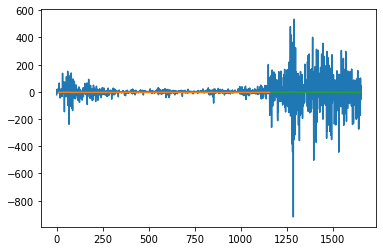

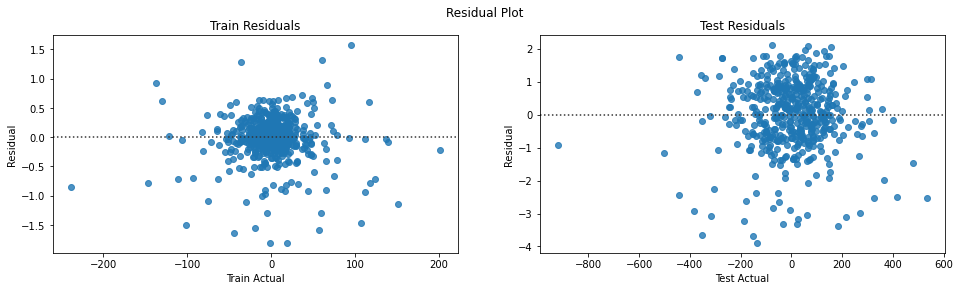

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832            0.0
1 -0.017258       -0.017258            0.0
2  0.056190        0.056190            0.0
3  0.077535        0.077535            0.0
4  0.157851        0.157851            0.0
5 -0.018182       -0.018182            0.0
6  0.010839        0.010839            0.0
7  0.019148        0.019148            0.0
8 -0.015516       -0.015516            0.0
9 -0.095959       -0.095959            0.0

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605           0.0
1  0.102482       0.102482           0.0
2 -0.004465      -0.004465           0.0
3  0.130479       0.130479           0.0
4 -0.048286      -0.048286           0.0
5  0.024647       0.024647           0.0
6 -0.076541      -0.076541           0.0
7  0.063283       0.063283           0.0
8  0.037547       0.037547           0.0
9 -0.004635      -0.004635           0.0

RMSE Train = 0.05107586243829624
RMSE Test = 0.050789093609195264
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


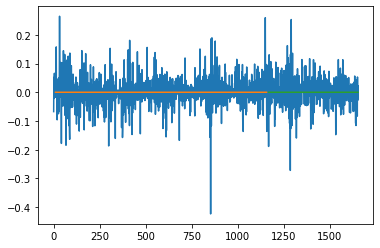

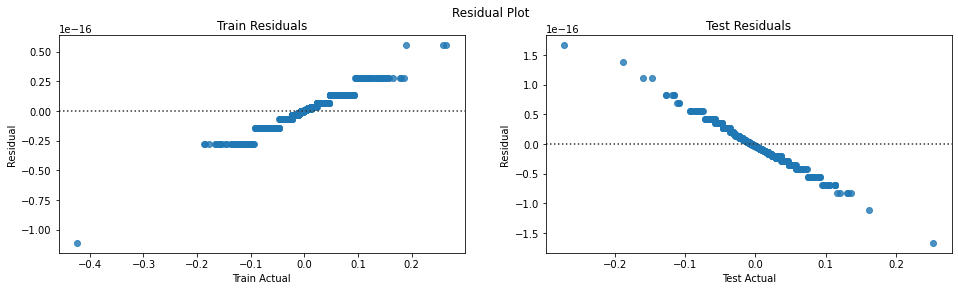

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     326.925964
1  0.058398      360.401001     336.602295
2  0.062681      380.652008     344.310577
3  0.068924      410.165985     353.584991
4  0.082619      474.911011     368.369385
5  0.080792      466.276001     397.660889
6  0.081861      471.329987     426.012512
7  0.083770      480.355011     446.483490
8  0.082194      472.902008     460.744904
9  0.072595      427.523010     469.208496

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1224.364014
1  0.243709    1236.512207   1212.186279
2  0.242541    1230.990601   1186.859131
3  0.276515    1391.609375   1163.063232
4  0.262302    1324.414795   1186.436523
5  0.269207    1357.058105   1210.401123
6  0.247236    1253.187134   1237.035034
7  0.264011    1332.492188   1233.017578
8  0.274593    1382.522827   1231.079468
9  0.273238    1376.115479   1240.319580

RMSE Train = 42.499785257685076
RMSE Test = 343.6330602867296
MAPE Train = 0.07653435265213135
MAPE Test = 0.10073641640388825
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


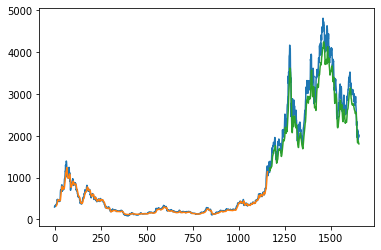

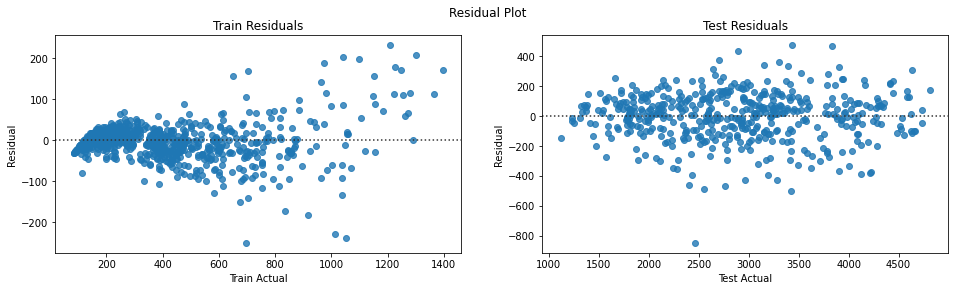

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      -5.114048
1  0.128224       -6.329010      -5.121173
2  0.146512       20.251007      -5.149436
3  0.152885       29.513977      -5.233964
4  0.177126       64.745026      -4.901697
5  0.126637       -8.635010      -4.377285
6  0.136056        5.053986      -4.093833
7  0.138788        9.025024      -4.407086
8  0.127450       -7.453003      -4.664072
9  0.101356      -45.378998      -4.894593

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     -2.636227
1  0.211663     114.941284     -2.710403
2  0.128779      -5.521606     -3.850946
3  0.243091     160.618774     -1.752996
4  0.086346     -67.194580     -1.919606
5  0.155038      32.643310     -1.389996
6  0.061111    -103.870971     -1.935957
7  0.187144      79.305054     -2.879699
8  0.167002      50.030639     -4.096107
9  0.128170      -6.407348     -3.015556

RMSE Train = 25.966452596605308
RMSE Test = 142.68730606073348
MAPE Train = 7.597896103982716
MAPE Test = 1.018949332280001
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


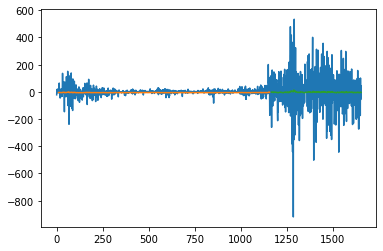

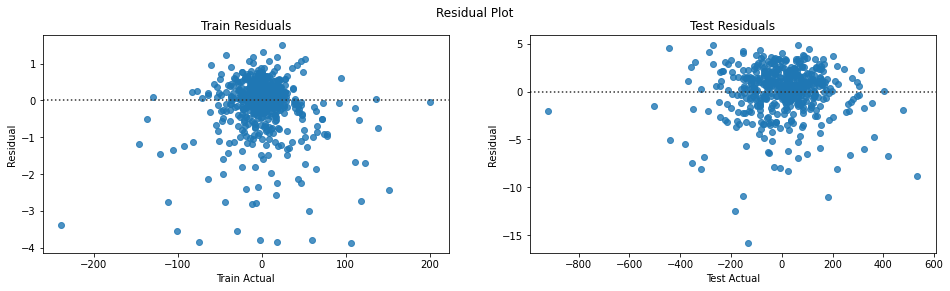

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832            0.0
1 -0.017258       -0.017258            0.0
2  0.056190        0.056190            0.0
3  0.077535        0.077535            0.0
4  0.157851        0.157851            0.0
5 -0.018182       -0.018182            0.0
6  0.010839        0.010839            0.0
7  0.019148        0.019148            0.0
8 -0.015516       -0.015516            0.0
9 -0.095959       -0.095959            0.0

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605           0.0
1  0.102482       0.102482           0.0
2 -0.004465      -0.004465           0.0
3  0.130479       0.130479           0.0
4 -0.048286      -0.048286           0.0
5  0.024647       0.024647           0.0
6 -0.076541      -0.076541           0.0
7  0.063283       0.063283           0.0
8  0.037547       0.037547           0.0
9 -0.004635      -0.004635           0.0

RMSE Train = 0.05107586243829624
RMSE Test = 0.050789093609195264
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


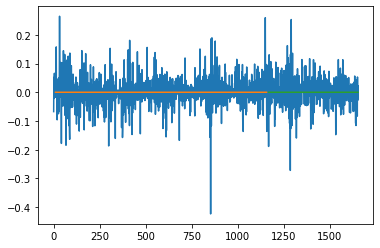

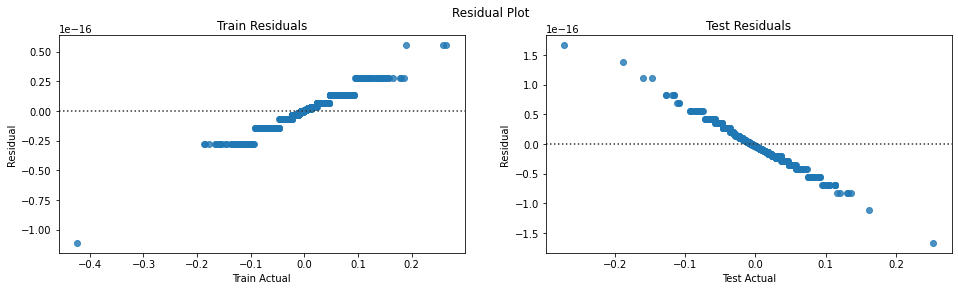

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   37.435975   
1           LSTM       3.0             Change in Close Price   25.205096   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
3   Stacked LSTM       3.0                             Close   45.597673   
4   Stacked LSTM       3.0             Change in Close Price   25.359102   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6       CNN-LSTM       3.0                             Close   35.900997   
7       CNN-LSTM       3.0             Change in Close Price   25.840038   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
9           LSTM       5.0                             Close   38.391395   
10          LSTM       5.0             Change in Close Price   25.163548   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
12  Stacked LSTM       5.0                             Close   45.300511   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
15      CNN-LSTM       5.0                             Close   45.253096   
16      CNN-LSTM       5.0             Change in Close Price   25.404851   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
18          LSTM      10.0                             Close   40.575085   
19          LSTM      10.0             Change in Close Price   25.448772   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
21  Stacked LSTM      10.0                             Close  352.905323   
22  Stacked LSTM      10.0             Change in Close Price   25.663393   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
24      CNN-LSTM      10.0                             Close   42.499785   
25      CNN-LSTM      10.0             Change in Close Price   25.966453   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   

      rmse_test  mape_train  mape_test  
0    285.149608    0.076284   0.085919  
1    142.296399    2.699700   1.053698  
2      0.050825    1.000000   1.000000  
3    334.954300    0.138283   0.100646  
4    141.759720    3.302766   1.004020  
5      0.050825    1.000000   1.000000  
6    172.263416    0.088809   0.049753  
7    142.019868    7.188315   1.035795  
8      0.050825    1.000000   1.000000  
9    314.345662    0.067263   0.094555  
10   142.299670    2.583434   1.059601  
11     0.050779    1.000000   1.000000  
12   333.534212    0.108241   0.095456  
13   142.027517    4.603332   1.009482  
14     0.050779    1.000000   1.000000  
15   277.120051    0.078948   0.081868  
16   142.111263    3.937408   1.005828  
17     0.050779    1.000000   1.000000  
18   302.641128    0.087650   0.083976  
19   142.674940    4.184047   1.016741  
20     0.050789    1.000000   1.000000  
21  2913.724957    0.639605   0.967708  
22   142.604228    5.415805   1.021157  
23     0.050789    1.000000   1.000000  
24   343.633060    0.076534   0.100736  
25   142.687306    7.597896   1.018949  
26     0.050789    1.000000   1.000000

################################################################
################## Executing for interval  20  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Percentage Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) 

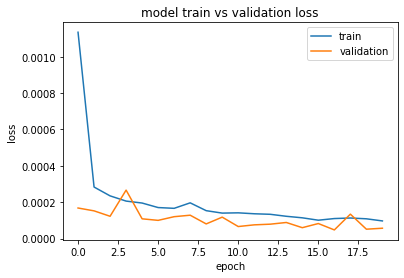

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_182 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_37 (Dropout)        (None, 100)               0         
                                                                 
 dense_200 (Dense)           (None, 16)                1616      
                                                                 
 dense_201 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


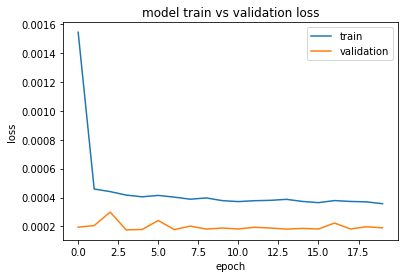

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_183 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_38 (Dropout)        (None, 100)               0         
                                                                 
 dense_202 (Dense)           (None, 16)                1616      
                                                                 
 dense_203 (Dense)           (None, 1)                 17        
                                                                 
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
None


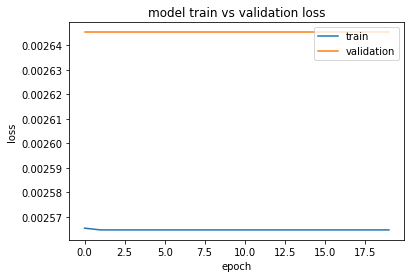

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_184 (LSTM)             (None, 20, 100)           40800     
                                                                 
 dropout_39 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_185 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_40 (Dropout)        (None, 100)               0         
                                                                 
 dense_204 (Dense)           (None, 16)                1616      
                                                                 
 dense_205 (Dense)           (None, 1)                 17        
                                                                 
Tot

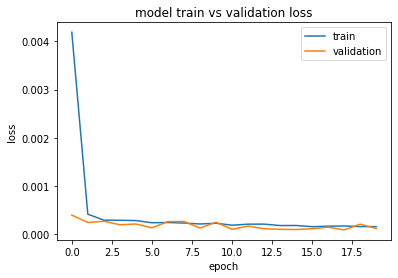

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_186 (LSTM)             (None, 20, 100)           40800     
                                                                 
 dropout_41 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_187 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_42 (Dropout)        (None, 100)               0         
                                                                 
 dense_206 (Dense)           (None, 16)                1616      
                                                                 
 dense_207 (Dense)           (None, 1)                 17        
                                                               

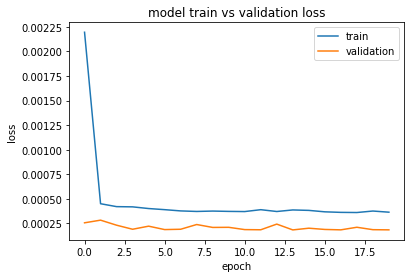

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_188 (LSTM)             (None, 20, 100)           40800     
                                                                 
 dropout_43 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_189 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_44 (Dropout)        (None, 100)               0         
                                                                 
 dense_208 (Dense)           (None, 16)                1616      
                                                                 
 dense_209 (Dense)           (None, 1)                 17        
                                                    

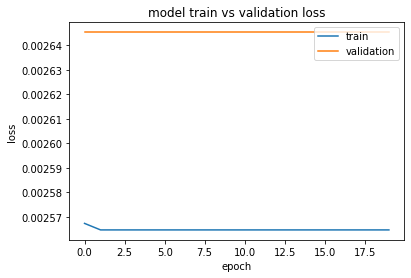

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_45 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_190 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_45 (Dropout)        (None, 100)               0         
                                                                 
 dense_210 (Dense)           (None, 16)                1616      
                                                                 
 dense_211 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_________________________________________________________________
Non

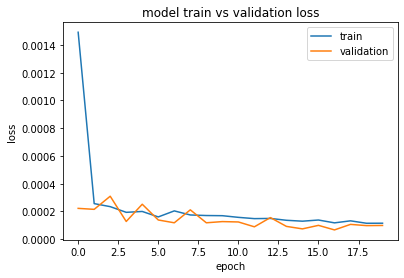

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_46 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_191 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_46 (Dropout)        (None, 100)               0         
                                                                 
 dense_212 (Dense)           (None, 16)                1616      
                                                                 
 dense_213 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
_______________________________________________________________

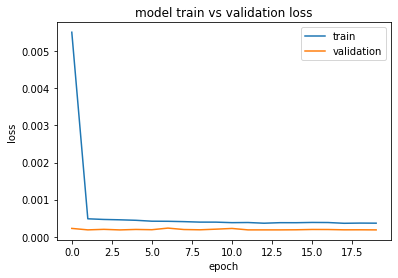

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_47 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_192 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_47 (Dropout)        (None, 100)               0         
                                                                 
 dense_214 (Dense)           (None, 16)                1616      
                                                                 
 dense_215 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,265
Trainable params: 45,265
Non-trainable params: 0
____________________________________________________

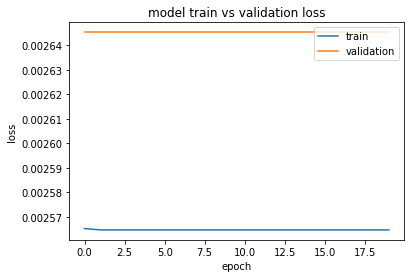

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     470.125702
1  0.080848      466.540009     465.582794
2  0.080194      463.449005     467.712921
3  0.080703      465.852997     467.974304
4  0.081623      470.204010     468.687317
5  0.080159      463.281006     470.521820
6  0.072821      428.588013     469.461060
7  0.074052      434.407990     456.764008
8  0.078625      456.031006     448.938477
9  0.082321      473.502014     449.707153

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1277.088745
1  0.271741    1369.040527   1267.474609
2  0.302655    1515.193726   1275.503296
3  0.333476    1660.909546   1323.707397
4  0.319485    1594.762695   1397.501709
5  0.345689    1718.650879   1439.634033
6  0.337059    1677.846802   1502.546143
7  0.323602    1614.227783   1538.307007
8  0.351605    1746.616821   1540.893433
9  0.356135    1768.035034   1578.145874

RMSE Train = 37.96580902460442
RMSE Test = 359.63200978589697
MAPE Train = 0.07417839325695172
MAPE Test = 0.10502987453721231
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


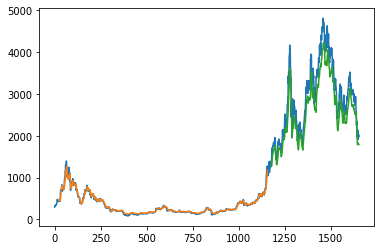

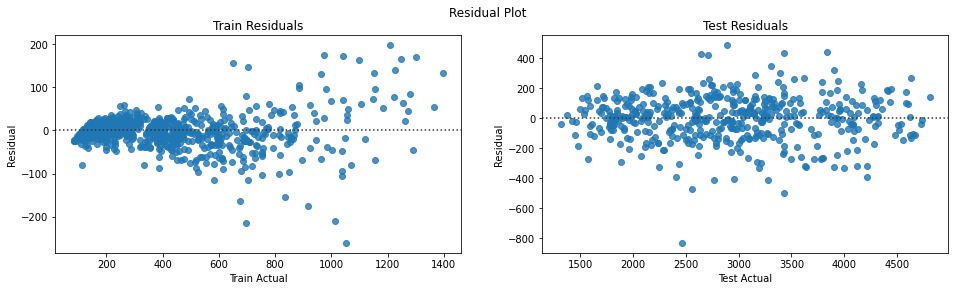

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004      -1.779937
1  0.145944       19.425995      -1.322815
2  0.130452       -3.091004      -0.982903
3  0.134233        2.403992      -1.145831
4  0.135572        4.351013      -1.170412
5  0.127815       -6.923004      -1.155490
6  0.108708      -34.692993      -1.352919
7  0.136583        5.819977      -2.015916
8  0.147456       21.623016      -1.761832
9  0.144599       17.471008      -1.274194

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      0.188112
1  0.169770      54.054321     -1.276165
2  0.233138     146.153199     -0.240704
3  0.232837     145.715820      2.427572
4  0.087067     -66.146851      4.628395
5  0.217819     123.888184      2.103447
6  0.104504     -40.804077      3.670402
7  0.088806     -63.619019      1.714091
8  0.223668     132.389038     -0.142120
9  0.147315      21.418213      2.082959

RMSE Train = 25.27533170590647
RMSE Test = 143.2791755426538
MAPE Train = 2.5751054932247537
MAPE Test = 1.0212173513474925
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


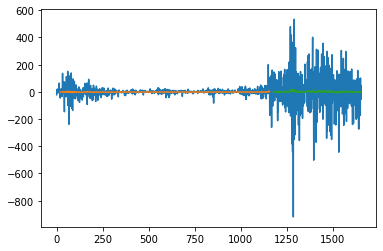

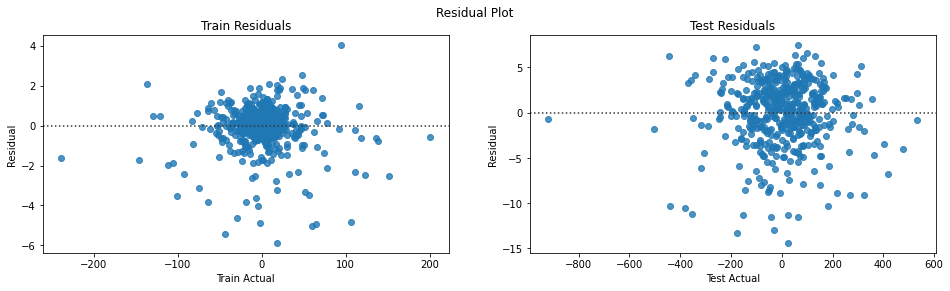

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824            0.0
1  0.043448        0.043448            0.0
2 -0.006625       -0.006625            0.0
3  0.005187        0.005187            0.0
4  0.009340        0.009340            0.0
5 -0.014723       -0.014723            0.0
6 -0.074885       -0.074885            0.0
7  0.013579        0.013579            0.0
8  0.049776        0.049776            0.0
9  0.038311        0.038311            0.0

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422           0.0
1  0.041106       0.041106           0.0
2  0.106756       0.106756           0.0
3  0.096170       0.096170           0.0
4 -0.039826      -0.039826           0.0
5  0.077684       0.077684           0.0
6 -0.023742      -0.023742           0.0
7 -0.037917      -0.037917           0.0
8  0.082014       0.082014           0.0
9  0.012263       0.012263           0.0

RMSE Train = 0.05090548489743309
RMSE Test = 0.0497136354488888
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


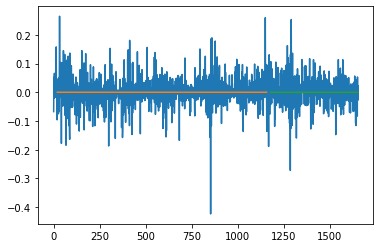

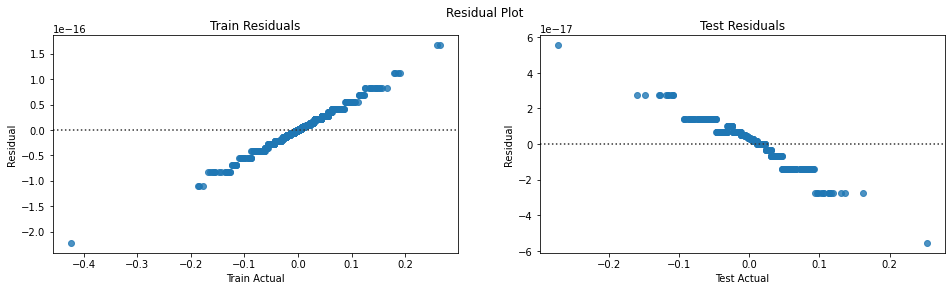

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     466.609497
1  0.080848      466.540009     465.042419
2  0.080194      463.449005     463.639648
3  0.080703      465.852997     461.983063
4  0.081623      470.204010     460.643066
5  0.080159      463.281006     460.215240
6  0.072821      428.588013     459.416138
7  0.074052      434.407990     453.764130
8  0.078625      456.031006     446.383270
9  0.082321      473.502014     441.850311

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1216.187500
1  0.271741    1369.040527   1219.418213
2  0.302655    1515.193726   1224.447144
3  0.333476    1660.909546   1247.992065
4  0.319485    1594.762695   1294.178955
5  0.345689    1718.650879   1339.268555
6  0.337059    1677.846802   1392.652344
7  0.323602    1614.227783   1438.819824
8  0.351605    1746.616821   1465.819824
9  0.356135    1768.035034   1495.271851

RMSE Train = 51.149715442168315
RMSE Test = 564.0106205997283
MAPE Train = 0.10224288346152627
MAPE Test = 0.1652241926504073
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


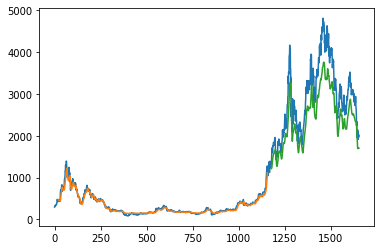

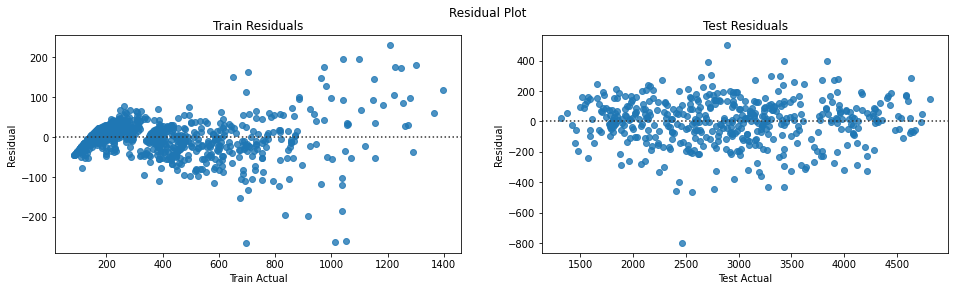

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       3.556051
1  0.145944       19.425995       3.521096
2  0.130452       -3.091004       3.521096
3  0.134233        2.403992       3.509791
4  0.135572        4.351013       3.500348
5  0.127815       -6.923004       3.495280
6  0.108708      -34.692993       3.478063
7  0.136583        5.819977       3.418591
8  0.147456       21.623016       3.395526
9  0.144599       17.471008       3.415754

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      3.698492
1  0.169770      54.054321      3.597611
2  0.233138     146.153199      3.600470
3  0.232837     145.715820      3.778689
4  0.087067     -66.146851      4.040873
5  0.217819     123.888184      4.045573
6  0.104504     -40.804077      4.164580
7  0.088806     -63.619019      4.115028
8  0.223668     132.389038      3.947616
9  0.147315      21.418213      3.992772

RMSE Train = 25.38454972110127
RMSE Test = 143.03345360561227
MAPE Train = 4.990144324213217
MAPE Test = 1.0268099523281413
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


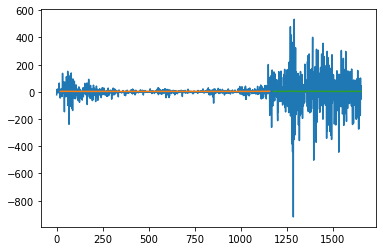

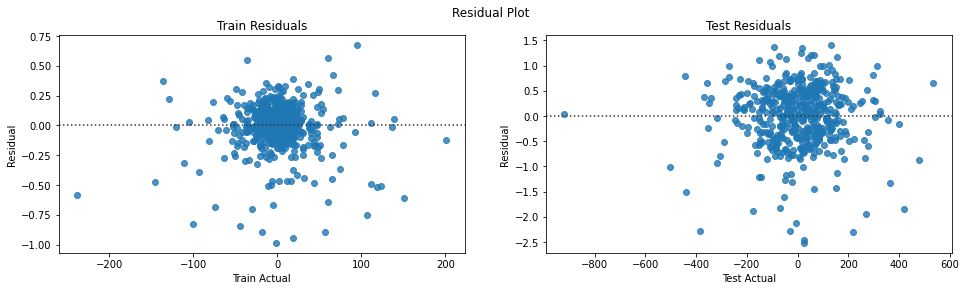

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824            0.0
1  0.043448        0.043448            0.0
2 -0.006625       -0.006625            0.0
3  0.005187        0.005187            0.0
4  0.009340        0.009340            0.0
5 -0.014723       -0.014723            0.0
6 -0.074885       -0.074885            0.0
7  0.013579        0.013579            0.0
8  0.049776        0.049776            0.0
9  0.038311        0.038311            0.0

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422           0.0
1  0.041106       0.041106           0.0
2  0.106756       0.106756           0.0
3  0.096170       0.096170           0.0
4 -0.039826      -0.039826           0.0
5  0.077684       0.077684           0.0
6 -0.023742      -0.023742           0.0
7 -0.037917      -0.037917           0.0
8  0.082014       0.082014           0.0
9  0.012263       0.012263           0.0

RMSE Train = 0.05090548489743309
RMSE Test = 0.0497136354488888
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


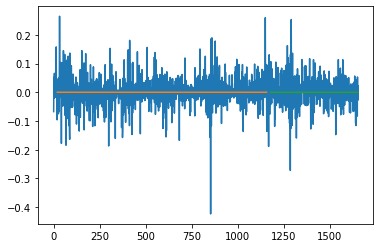

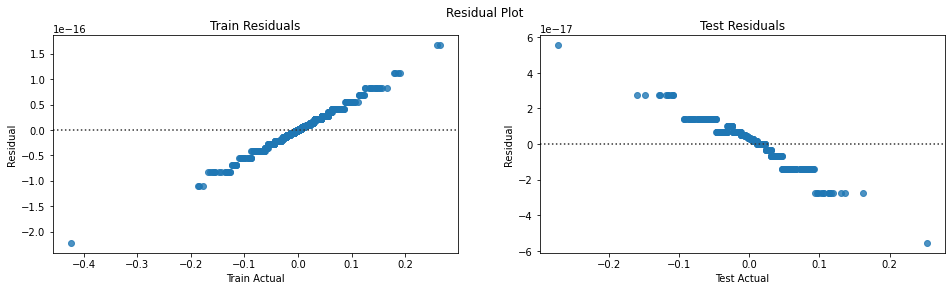

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     472.448059
1  0.080848      466.540009     466.482849
2  0.080194      463.449005     460.472626
3  0.080703      465.852997     459.079529
4  0.081623      470.204010     460.435394
5  0.080159      463.281006     461.966614
6  0.072821      428.588013     462.219604
7  0.074052      434.407990     454.897247
8  0.078625      456.031006     446.205139
9  0.082321      473.502014     440.503510

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1250.255737
1  0.271741    1369.040527   1252.788696
2  0.302655    1515.193726   1257.723022
3  0.333476    1660.909546   1285.673340
4  0.319485    1594.762695   1344.785278
5  0.345689    1718.650879   1398.854370
6  0.337059    1677.846802   1460.700562
7  0.323602    1614.227783   1499.816162
8  0.351605    1746.616821   1520.736084
9  0.356135    1768.035034   1544.753174

RMSE Train = 46.46672729045125
RMSE Test = 429.9643088805199
MAPE Train = 0.10373926084359285
MAPE Test = 0.1248359984605795
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


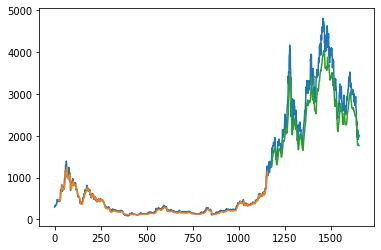

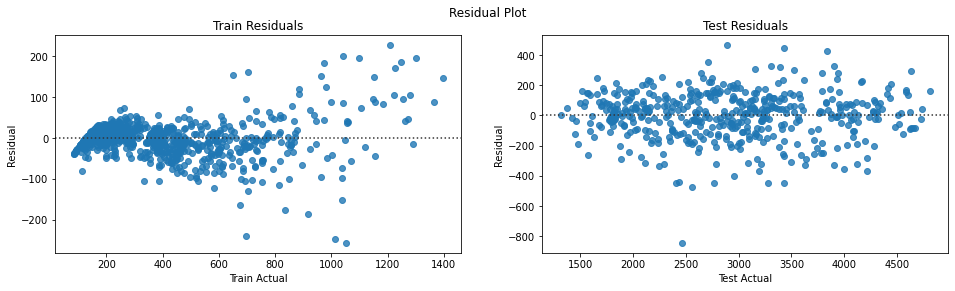

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       3.303634
1  0.145944       19.425995       2.942801
2  0.130452       -3.091004       3.045413
3  0.134233        2.403992       3.164724
4  0.135572        4.351013       3.124463
5  0.127815       -6.923004       3.093926
6  0.108708      -34.692993       3.060573
7  0.136583        5.819977       2.880579
8  0.147456       21.623016       2.643777
9  0.144599       17.471008       2.732832

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      3.998598
1  0.169770      54.054321      3.670402
2  0.233138     146.153199      3.216160
3  0.232837     145.715820      3.924010
4  0.087067     -66.146851      5.430800
5  0.217819     123.888184      6.070776
6  0.104504     -40.804077      5.629766
7  0.088806     -63.619019      5.795164
8  0.223668     132.389038      5.029879
9  0.147315      21.418213      4.449504

RMSE Train = 25.311550254370964
RMSE Test = 143.05059952621556
MAPE Train = 4.263805215866082
MAPE Test = 1.0333704993508566
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


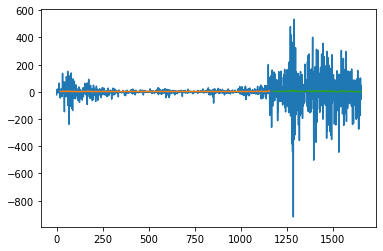

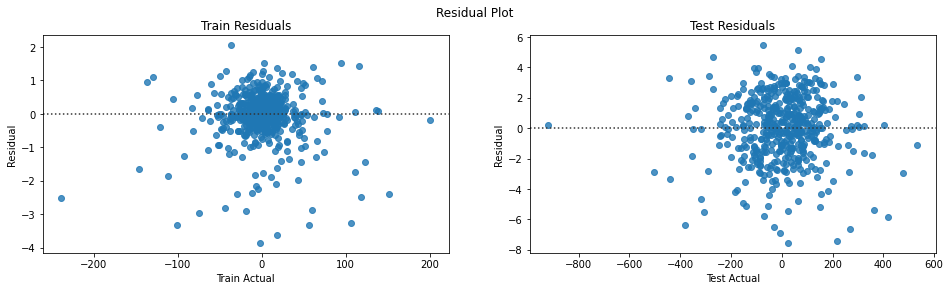

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824            0.0
1  0.043448        0.043448            0.0
2 -0.006625       -0.006625            0.0
3  0.005187        0.005187            0.0
4  0.009340        0.009340            0.0
5 -0.014723       -0.014723            0.0
6 -0.074885       -0.074885            0.0
7  0.013579        0.013579            0.0
8  0.049776        0.049776            0.0
9  0.038311        0.038311            0.0

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422           0.0
1  0.041106       0.041106           0.0
2  0.106756       0.106756           0.0
3  0.096170       0.096170           0.0
4 -0.039826      -0.039826           0.0
5  0.077684       0.077684           0.0
6 -0.023742      -0.023742           0.0
7 -0.037917      -0.037917           0.0
8  0.082014       0.082014           0.0
9  0.012263       0.012263           0.0

RMSE Train = 0.05090548489743309
RMSE Test = 0.0497136354488888
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


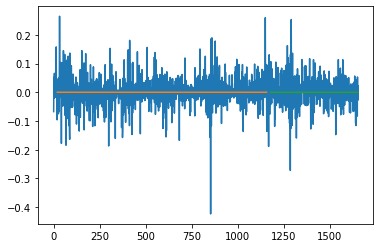

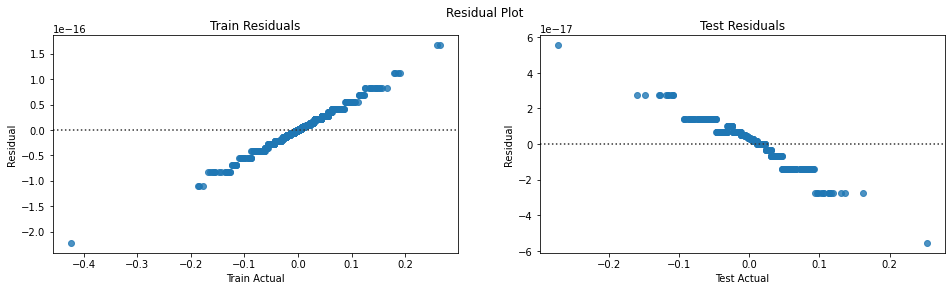

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   37.435975   
1           LSTM       3.0             Change in Close Price   25.205096   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
3   Stacked LSTM       3.0                             Close   45.597673   
4   Stacked LSTM       3.0             Change in Close Price   25.359102   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6       CNN-LSTM       3.0                             Close   35.900997   
7       CNN-LSTM       3.0             Change in Close Price   25.840038   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
9           LSTM       5.0                             Close   38.391395   
10          LSTM       5.0             Change in Close Price   25.163548   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
12  Stacked LSTM       5.0                             Close   45.300511   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
15      CNN-LSTM       5.0                             Close   45.253096   
16      CNN-LSTM       5.0             Change in Close Price   25.404851   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
18          LSTM      10.0                             Close   40.575085   
19          LSTM      10.0             Change in Close Price   25.448772   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
21  Stacked LSTM      10.0                             Close  352.905323   
22  Stacked LSTM      10.0             Change in Close Price   25.663393   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
24      CNN-LSTM      10.0                             Close   42.499785   
25      CNN-LSTM      10.0             Change in Close Price   25.966453   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
27          LSTM      20.0                             Close   37.965809   
28          LSTM      20.0             Change in Close Price   25.275332   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
30  Stacked LSTM      20.0                             Close   51.149715   
31  Stacked LSTM      20.0             Change in Close Price   25.384550   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
33      CNN-LSTM      20.0                             Close   46.466727   
34      CNN-LSTM      20.0             Change in Close Price   25.311550   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   

      rmse_test  mape_train  mape_test  
0    285.149608    0.076284   0.085919  
1    142.296399    2.699700   1.053698  
2      0.050825    1.000000   1.000000  
3    334.954300    0.138283   0.100646  
4    141.759720    3.302766   1.004020  
5      0.050825    1.000000   1.000000  
6    172.263416    0.088809   0.049753  
7    142.019868    7.188315   1.035795  
8      0.050825    1.000000   1.000000  
9    314.345662    0.067263   0.094555  
10   142.299670    2.583434   1.059601  
11     0.050779    1.000000   1.000000  
12   333.534212    0.108241   0.095456  
13   142.027517    4.603332   1.009482  
14     0.050779    1.000000   1.000000  
15   277.120051    0.078948   0.081868  
16   142.111263    3.937408   1.005828  
17     0.050779    1.000000   1.000000  
18   302.641128    0.087650   0.083976  
19   142.674940    4.184047   1.016741  
20     0.050789    1.000000   1.000000  
21  2913.724957    0.639605   0.967708  
22   142.604228    5.415805   1.021157  
23     0.050789    1.000000   1.000000  
24   343.633060    0.076534   0.100736  
25   142.687306    7.597896   1.018949  
26     0.050789    1.000000   1.000000  
27   359.632010    0.074178   0.105030  
28   143.

Total execution time (mins) =  10.49372566541036


model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   35.900997   
15      CNN-LSTM       5.0                             Close   45.253096   
18          LSTM      10.0                             Close   40.575085   
0           LSTM       3.0                             Close   37.435975   
9           LSTM       5.0                             Close   38.391395   
12  Stacked LSTM       5.0                             Close   45.300511   
3   Stacked LSTM       3.0                             Close   45.597673   
24      CNN-LSTM      10.0                             Close   42.499785   
27          LSTM      20.0                             Close   37.965809   
33      CNN-LSTM      20.0                             Close   46.466727   
30  Stacked LSTM      20.0                             Close   51.149715   
21  Stacked LSTM      10.0                             Close  352.905323   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
4   Stacked LSTM       3.0             Change in Close Price   25.359102   
16      CNN-LSTM       5.0             Change in Close Price   25.404851   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
19          LSTM      10.0             Change in Close Price   25.448772   
25      CNN-LSTM      10.0             Change in Close Price   25.966453   
22  Stacked LSTM      10.0             Change in Close Price   25.663393   
28          LSTM      20.0             Change in Close Price   25.275332   
31  Stacked LSTM      20.0             Change in Close Price   25.384550   
34      CNN-LSTM      20.0             Change in Close Price   25.311550   
7       CNN-LSTM       3.0             Change in Close Price   25.840038   
1           LSTM       3.0             Change in Close Price   25.205096   
10          LSTM       5.0             Change in Close Price   25.163548   

      rmse_test  mape_train  mape_test  
6    172.263416    0.088809   0.049753  
15   277.120051    0.078948   0.081868  
18   302.641128    0.087650   0.083976  
0    285.149608    0.076284   0.085919  
9    314.345662    0.067263   0.094555  
12   333.534212    0.108241   0.095456  
3    334.954300    0.138283   0.100646  
24   343.633060    0.076534   0.100736  
27   359.632010    0.074178   0.105030  
33   429.964309    0.103739   0.124836  
30   564.010621    0.102243   0.165224  
21  2913.724957    0.639605   0.967708  
29     0.049714    1.000000   1.000000  
32     0.049714    1.000000   1.000000  
23     0.050789    1.000000   1.000000  
20     0.050789    1.000000   1.000000  
26     0.050789    1.000000   1.000000  
17     0.050779    1.000000   1.000000  
8      0.050825    1.000000   1.000000  
2      0.050825    1.000000   1.000000  
5      0.050825    1.000000   1.000000  
11     0.050779    1.000000   1.000000  
35     0.049714    1.000000   1.000000  
14     0.050779    1.000000   1.000000  
4    141.759720    3.302766   1.004020  
16   142.111263    3.937408   1.005828  
13   142.027517    4.603332   1.009482  
19   142.674940    4.184047   1.016741  
25   142.

In [365]:
import time

start=time.time()

ibm = IntervalBasedModel(df_close, df_deltaClose, df_deltaPctClose)
ibm.execute_all_intervals()

end=time.time()
total_execution_time = end-start
print("Total execution time (mins) = ", total_execution_time/60)

metrics_df = ibm.get_metrics_df()

metrics_df.sort_values(by=['mape_test'], ascending=True)

## Evaluate Models

In [366]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   35.900997   
15      CNN-LSTM       5.0                             Close   45.253096   
18          LSTM      10.0                             Close   40.575085   
0           LSTM       3.0                             Close   37.435975   
9           LSTM       5.0                             Close   38.391395   
12  Stacked LSTM       5.0                             Close   45.300511   
3   Stacked LSTM       3.0                             Close   45.597673   
24      CNN-LSTM      10.0                             Close   42.499785   
27          LSTM      20.0                             Close   37.965809   
33      CNN-LSTM      20.0                             Close   46.466727   
30  Stacked LSTM      20.0                             Close   51.149715   
21  Stacked LSTM      10.0                             Close  352.905323   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
4   Stacked LSTM       3.0             Change in Close Price   25.359102   
16      CNN-LSTM       5.0             Change in Close Price   25.404851   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
19          LSTM      10.0             Change in Close Price   25.448772   
25      CNN-LSTM      10.0             Change in Close Price   25.966453   
22  Stacked LSTM      10.0             Change in Close Price   25.663393   
28          LSTM      20.0             Change in Close Price   25.275332   
31  Stacked LSTM      20.0             Change in Close Price   25.384550   
34      CNN-LSTM      20.0             Change in Close Price   25.311550   
7       CNN-LSTM       3.0             Change in Close Price   25.840038   
1           LSTM       3.0             Change in Close Price   25.205096   
10          LSTM       5.0             Change in Close Price   25.163548   

      rmse_test  mape_train  mape_test  
6    172.263416    0.088809   0.049753  
15   277.120051    0.078948   0.081868  
18   302.641128    0.087650   0.083976  
0    285.149608    0.076284   0.085919  
9    314.345662    0.067263   0.094555  
12   333.534212    0.108241   0.095456  
3    334.954300    0.138283   0.100646  
24   343.633060    0.076534   0.100736  
27   359.632010    0.074178   0.105030  
33   429.964309    0.103739   0.124836  
30   564.010621    0.102243   0.165224  
21  2913.724957    0.639605   0.967708  
29     0.049714    1.000000   1.000000  
32     0.049714    1.000000   1.000000  
23     0.050789    1.000000   1.000000  
20     0.050789    1.000000   1.000000  
26     0.050789    1.000000   1.000000  
17     0.050779    1.000000   1.000000  
8      0.050825    1.000000   1.000000  
2      0.050825    1.000000   1.000000  
5      0.050825    1.000000   1.000000  
11     0.050779    1.000000   1.000000  
35     0.049714    1.000000   1.000000  
14     0.050779    1.000000   1.000000  
4    141.759720    3.302766   1.004020  
16   142.111263    3.937408   1.005828  
13   142.027517    4.603332   1.009482  
19   142.674940    4.184047   1.016741  
25   142.

### Evaluate By MAPE and RMSE

In [367]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   35.900997   
15      CNN-LSTM       5.0                             Close   45.253096   
18          LSTM      10.0                             Close   40.575085   
0           LSTM       3.0                             Close   37.435975   
9           LSTM       5.0                             Close   38.391395   
12  Stacked LSTM       5.0                             Close   45.300511   
3   Stacked LSTM       3.0                             Close   45.597673   
24      CNN-LSTM      10.0                             Close   42.499785   
27          LSTM      20.0                             Close   37.965809   
33      CNN-LSTM      20.0                             Close   46.466727   
30  Stacked LSTM      20.0                             Close   51.149715   
21  Stacked LSTM      10.0                             Close  352.905323   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
4   Stacked LSTM       3.0             Change in Close Price   25.359102   
16      CNN-LSTM       5.0             Change in Close Price   25.404851   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
19          LSTM      10.0             Change in Close Price   25.448772   
25      CNN-LSTM      10.0             Change in Close Price   25.966453   
22  Stacked LSTM      10.0             Change in Close Price   25.663393   
28          LSTM      20.0             Change in Close Price   25.275332   
31  Stacked LSTM      20.0             Change in Close Price   25.384550   
34      CNN-LSTM      20.0             Change in Close Price   25.311550   
7       CNN-LSTM       3.0             Change in Close Price   25.840038   
1           LSTM       3.0             Change in Close Price   25.205096   
10          LSTM       5.0             Change in Close Price   25.163548   

      rmse_test  mape_train  mape_test  
6    172.263416    0.088809   0.049753  
15   277.120051    0.078948   0.081868  
18   302.641128    0.087650   0.083976  
0    285.149608    0.076284   0.085919  
9    314.345662    0.067263   0.094555  
12   333.534212    0.108241   0.095456  
3    334.954300    0.138283   0.100646  
24   343.633060    0.076534   0.100736  
27   359.632010    0.074178   0.105030  
33   429.964309    0.103739   0.124836  
30   564.010621    0.102243   0.165224  
21  2913.724957    0.639605   0.967708  
29     0.049714    1.000000   1.000000  
32     0.049714    1.000000   1.000000  
23     0.050789    1.000000   1.000000  
20     0.050789    1.000000   1.000000  
26     0.050789    1.000000   1.000000  
17     0.050779    1.000000   1.000000  
8      0.050825    1.000000   1.000000  
2      0.050825    1.000000   1.000000  
5      0.050825    1.000000   1.000000  
11     0.050779    1.000000   1.000000  
35     0.049714    1.000000   1.000000  
14     0.050779    1.000000   1.000000  
4    141.759720    3.302766   1.004020  
16   142.111263    3.937408   1.005828  
13   142.027517    4.603332   1.009482  
19   142.674940    4.184047   1.016741  
25   142.

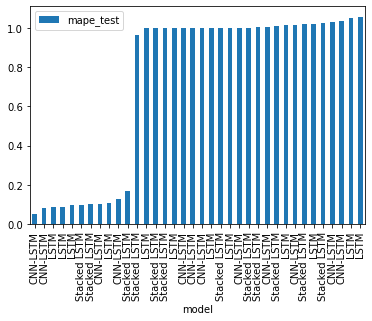

In [368]:
metrics_df.sort_values(by=['mape_test'], ascending=True).plot.bar(x='model', y='mape_test')
plt.show()

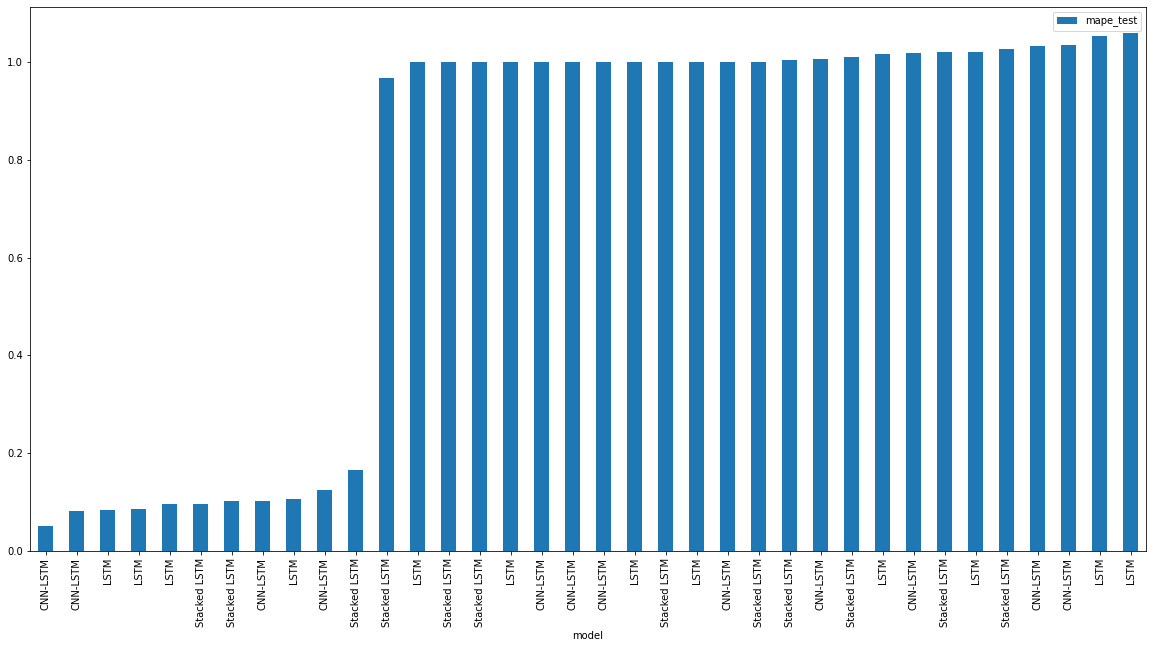

In [369]:
metrics_df.sort_values(by=['mape_test'], ascending=True).plot.bar(x='model', y='mape_test', figsize=(20,10))
plt.show()

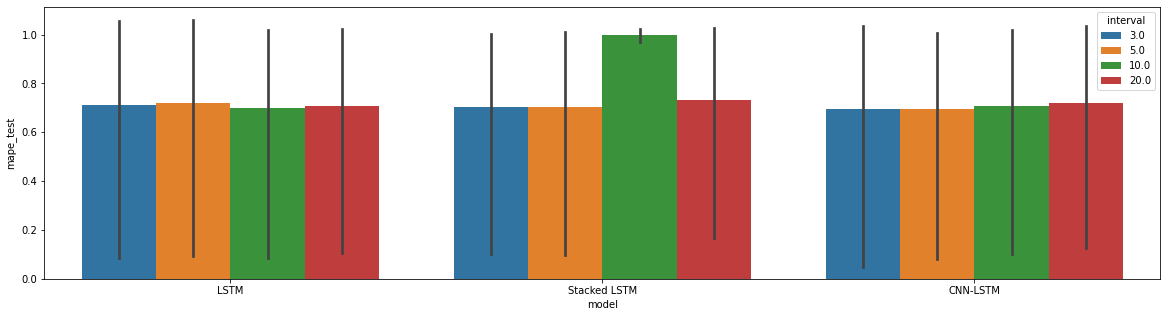

In [370]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df)
plt.show()

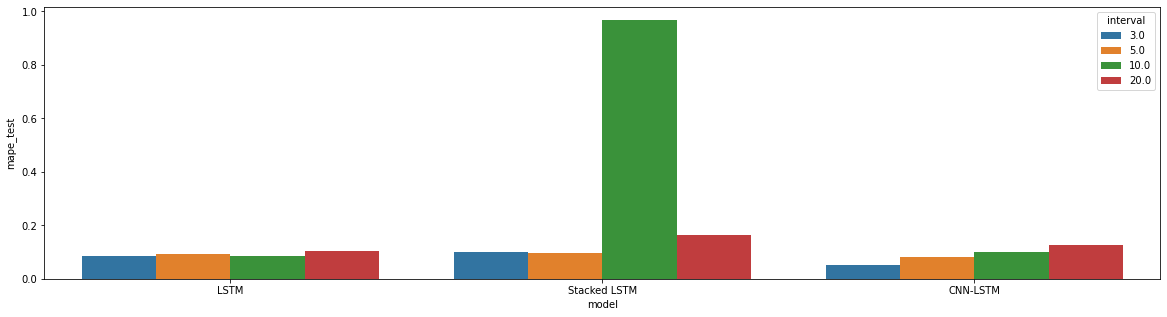

In [371]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df[metrics_df.target=="Close"])
plt.show()

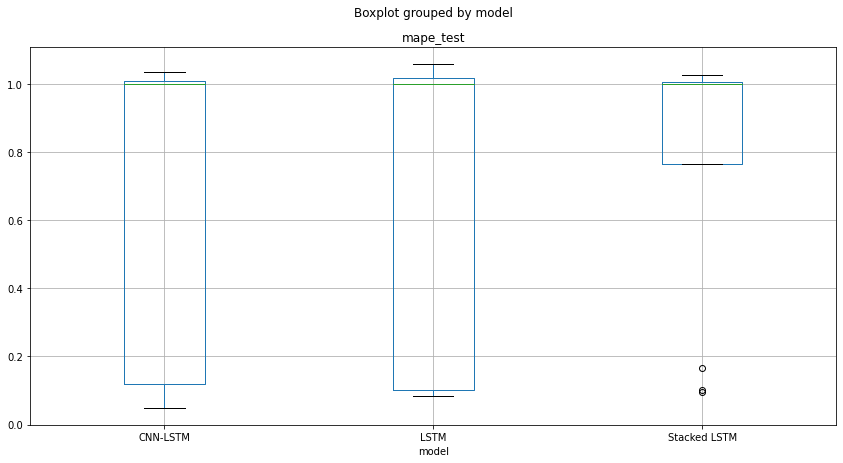

In [372]:
metrics_df.boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.show()

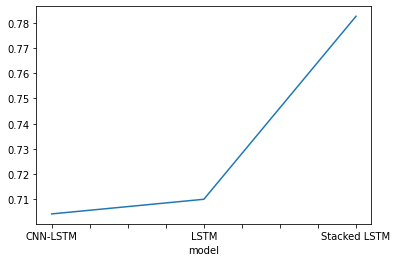

In [373]:
# metrics_df.groupby(by='model')
# metrics_df.groupby(by='model')['mape_test'].agg(['mean', 'min', 'max'])
metrics_df.groupby(by='model')['mape_test'].agg('mean').plot()

In [374]:
metrics_df.groupby(by='model')['mape_test'].agg('mean')

model
CNN-LSTM        0.704261
LSTM            0.710061
Stacked LSTM    0.782542
Name: mape_test, dtype: float64

In [375]:
for model in ['LSTM', 'Stacked LSTM', 'CNN-LSTM']:
  print(f"Best Performing {model} model")
  df = metrics_df[metrics_df.model == model].sort_values(by=['mape_test'], ascending=True)
  display(df)

Best Performing LSTM model


model  interval                            target  rmse_train   rmse_test  \
18  LSTM      10.0                             Close   40.575085  302.641128   
0   LSTM       3.0                             Close   37.435975  285.149608   
9   LSTM       5.0                             Close   38.391395  314.345662   
27  LSTM      20.0                             Close   37.965809  359.632010   
2   LSTM       3.0  Percentage Change in Close Price    0.050988    0.050825   
11  LSTM       5.0  Percentage Change in Close Price    0.050988    0.050779   
20  LSTM      10.0  Percentage Change in Close Price    0.051076    0.050789   
29  LSTM      20.0  Percentage Change in Close Price    0.050905    0.049714   
19  LSTM      10.0             Change in Close Price   25.448772  142.674940   
28  LSTM      20.0             Change in Close Price   25.275332  143.279176   
1   LSTM       3.0             Change in Close Price   25.205096  142.296399   
10  LSTM       5.0             Change in Close Price   25.163548  142.299670   

    mape_train  mape_test  
18    0.087650   0.083976  
0     0.076284   0.085919  
9     0.067263   0.094555  
27    0.074178   0.105030  
2     1.000000   1.000000  
11    1.000000   1.000000  
20    1.000000   1.000000  
29    1.000000   1.000000  
19    4.184047   1.016741  
28    2.575105   1.021217  
1     2.699700   1.053698  
10    2.583434   1.059601

Best Performing Stacked LSTM model


model  interval                            target  rmse_train  \
12  Stacked LSTM       5.0                             Close   45.300511   
3   Stacked LSTM       3.0                             Close   45.597673   
30  Stacked LSTM      20.0                             Close   51.149715   
21  Stacked LSTM      10.0                             Close  352.905323   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
4   Stacked LSTM       3.0             Change in Close Price   25.359102   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
22  Stacked LSTM      10.0             Change in Close Price   25.663393   
31  Stacked LSTM      20.0             Change in Close Price   25.384550   

      rmse_test  mape_train  mape_test  
12   333.534212    0.108241   0.095456  
3    334.954300    0.138283   0.100646  
30   564.010621    0.102243   0.165224  
21  2913.724957    0.639605   0.967708  
5      0.050825    1.000000   1.000000  
14     0.050779    1.000000   1.000000  
23     0.050789    1.000000   1.000000  
32     0.049714    1.000000   1.000000  
4    141.759720    3.302766   1.004020  
13   142.027517    4.603332   1.009482  
22   142.604228    5.415805   1.021157  
31   143.033454    4.990144   1.026810

Best Performing CNN-LSTM model


model  interval                            target  rmse_train  \
6   CNN-LSTM       3.0                             Close   35.900997   
15  CNN-LSTM       5.0                             Close   45.253096   
24  CNN-LSTM      10.0                             Close   42.499785   
33  CNN-LSTM      20.0                             Close   46.466727   
8   CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
17  CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
26  CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
35  CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
16  CNN-LSTM       5.0             Change in Close Price   25.404851   
25  CNN-LSTM      10.0             Change in Close Price   25.966453   
34  CNN-LSTM      20.0             Change in Close Price   25.311550   
7   CNN-LSTM       3.0             Change in Close Price   25.840038   

     rmse_test  mape_train  mape_test  
6   172.263416    0.088809   0.049753  
15  277.120051    0.078948   0.081868  
24  343.633060    0.076534   0.100736  
33  429.964309    0.103739   0.124836  
8     0.050825    1.000000   1.000000  
17    0.050779    1.000000   1.000000  
26    0.050789    1.000000   1.000000  
35    0.049714    1.000000   1.000000  
16  142.111263    3.937408   1.005828  
25  142.687306    7.597896   1.018949  
34  143.050600    4.263805   1.033370  
7   142.019868    7.188315   1.035795

[]

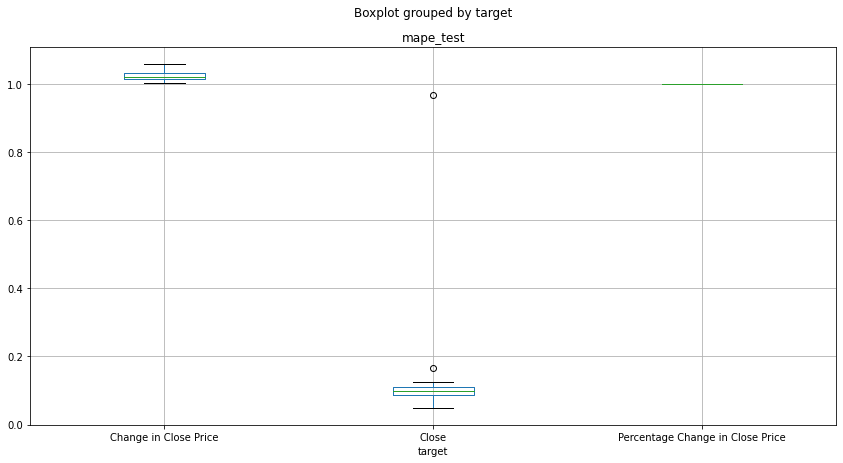

In [376]:
metrics_df.boxplot(column=['mape_test'], by='target', figsize=(14, 7))
plt.plot()

[]

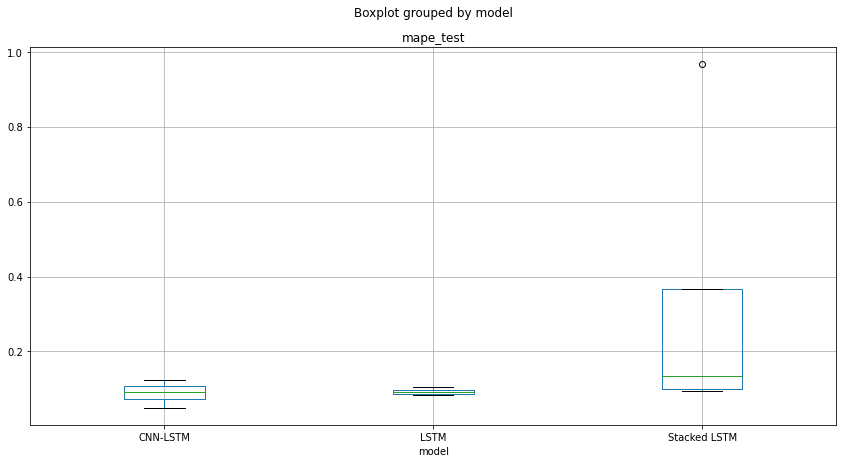

In [377]:
metrics_df[metrics_df.target == 'Close'].boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.plot()

In [378]:
# Display best performing model on Close price
metrics_df[metrics_df.target == 'Close'].sort_values(by=['mape_test'], ascending=True)

model  interval target  rmse_train    rmse_test  mape_train  \
6       CNN-LSTM       3.0  Close   35.900997   172.263416    0.088809   
15      CNN-LSTM       5.0  Close   45.253096   277.120051    0.078948   
18          LSTM      10.0  Close   40.575085   302.641128    0.087650   
0           LSTM       3.0  Close   37.435975   285.149608    0.076284   
9           LSTM       5.0  Close   38.391395   314.345662    0.067263   
12  Stacked LSTM       5.0  Close   45.300511   333.534212    0.108241   
3   Stacked LSTM       3.0  Close   45.597673   334.954300    0.138283   
24      CNN-LSTM      10.0  Close   42.499785   343.633060    0.076534   
27          LSTM      20.0  Close   37.965809   359.632010    0.074178   
33      CNN-LSTM      20.0  Close   46.466727   429.964309    0.103739   
30  Stacked LSTM      20.0  Close   51.149715   564.010621    0.102243   
21  Stacked LSTM      10.0  Close  352.905323  2913.724957    0.639605   

    mape_test  
6    0.049753  
15   0.081868  
18   0.083976  
0    0.085919  
9    0.094555  
12   0.095456  
3    0.100646  
24   0.100736  
27   0.105030  
33   0.124836  
30   0.165224  
21   0.967708

### Evaluate By Window Size

[]

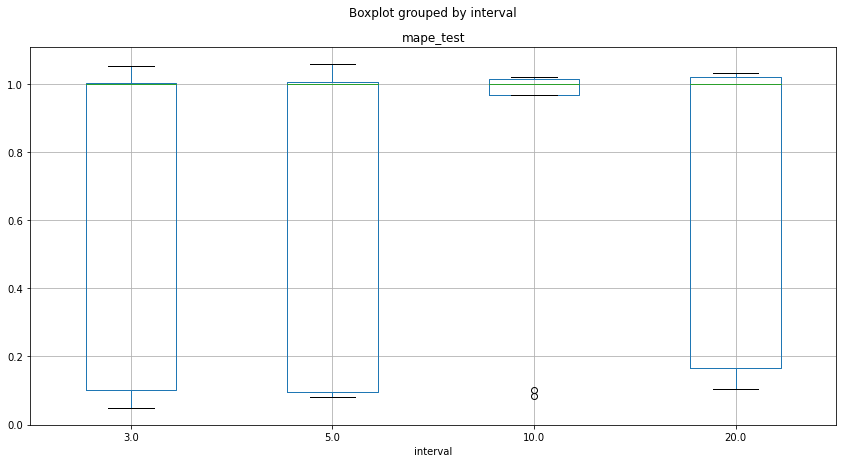

In [379]:
metrics_df.boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

[]

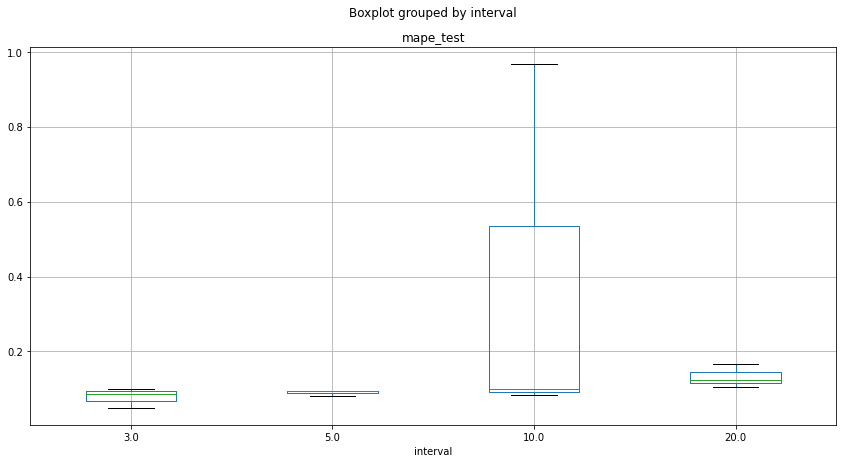

In [380]:
metrics_df[metrics_df.target=="Close"].boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

In [381]:
# metrics_df[metrics_df.target=="Close"]
metrics_df[metrics_df.interval=="Close"]

Empty DataFrame
Columns: [model, interval, target, rmse_train, rmse_test, mape_train, mape_test]
Index: []

In [382]:
# Display best performing model on Close price
for i in [3,5,10,20]:
  display(metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True))

model  interval                            target  rmse_train  \
6      CNN-LSTM       3.0                             Close   35.900997   
0          LSTM       3.0                             Close   37.435975   
3  Stacked LSTM       3.0                             Close   45.597673   
2          LSTM       3.0  Percentage Change in Close Price    0.050988   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050988   
4  Stacked LSTM       3.0             Change in Close Price   25.359102   
7      CNN-LSTM       3.0             Change in Close Price   25.840038   
1          LSTM       3.0             Change in Close Price   25.205096   

    rmse_test  mape_train  mape_test  
6  172.263416    0.088809   0.049753  
0  285.149608    0.076284   0.085919  
3  334.954300    0.138283   0.100646  
2    0.050825    1.000000   1.000000  
5    0.050825    1.000000   1.000000  
8    0.050825    1.000000   1.000000  
4  141.759720    3.302766   1.004020  
7  142.019868    7.188315   1.035795  
1  142.296399    2.699700   1.053698

model  interval                            target  rmse_train  \
15      CNN-LSTM       5.0                             Close   45.253096   
9           LSTM       5.0                             Close   38.391395   
12  Stacked LSTM       5.0                             Close   45.300511   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
16      CNN-LSTM       5.0             Change in Close Price   25.404851   
13  Stacked LSTM       5.0             Change in Close Price   25.509485   
10          LSTM       5.0             Change in Close Price   25.163548   

     rmse_test  mape_train  mape_test  
15  277.120051    0.078948   0.081868  
9   314.345662    0.067263   0.094555  
12  333.534212    0.108241   0.095456  
11    0.050779    1.000000   1.000000  
14    0.050779    1.000000   1.000000  
17    0.050779    1.000000   1.000000  
16  142.111263    3.937408   1.005828  
13  142.027517    4.603332   1.009482  
10  142.299670    2.583434   1.059601

model  interval                            target  rmse_train  \
18          LSTM      10.0                             Close   40.575085   
24      CNN-LSTM      10.0                             Close   42.499785   
21  Stacked LSTM      10.0                             Close  352.905323   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
19          LSTM      10.0             Change in Close Price   25.448772   
25      CNN-LSTM      10.0             Change in Close Price   25.966453   
22  Stacked LSTM      10.0             Change in Close Price   25.663393   

      rmse_test  mape_train  mape_test  
18   302.641128    0.087650   0.083976  
24   343.633060    0.076534   0.100736  
21  2913.724957    0.639605   0.967708  
20     0.050789    1.000000   1.000000  
23     0.050789    1.000000   1.000000  
26     0.050789    1.000000   1.000000  
19   142.674940    4.184047   1.016741  
25   142.687306    7.597896   1.018949  
22   142.604228    5.415805   1.021157

model  interval                            target  rmse_train  \
27          LSTM      20.0                             Close   37.965809   
33      CNN-LSTM      20.0                             Close   46.466727   
30  Stacked LSTM      20.0                             Close   51.149715   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
28          LSTM      20.0             Change in Close Price   25.275332   
31  Stacked LSTM      20.0             Change in Close Price   25.384550   
34      CNN-LSTM      20.0             Change in Close Price   25.311550   

     rmse_test  mape_train  mape_test  
27  359.632010    0.074178   0.105030  
33  429.964309    0.103739   0.124836  
30  564.010621    0.102243   0.165224  
29    0.049714    1.000000   1.000000  
32    0.049714    1.000000   1.000000  
35    0.049714    1.000000   1.000000  
28  143.279176    2.575105   1.021217  
31  143.033454    4.990144   1.026810  
34  143.050600    4.263805   1.033370

In [383]:
metrics_df['mape_test'].mean()

0.7322882862378183

In [384]:
# metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True)
print("Interval mean MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].mean())
print("Interval min MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].min())
print("Interval max MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].max())

Interval mean MAPE
interval
3.0     0.703315
5.0     0.705199
10.0    0.801030
20.0    0.719610
Name: mape_test, dtype: float64
Interval min MAPE
interval
3.0     0.049753
5.0     0.081868
10.0    0.083976
20.0    0.105030
Name: mape_test, dtype: float64
Interval max MAPE
interval
3.0     1.053698
5.0     1.059601
10.0    1.021157
20.0    1.033370
Name: mape_test, dtype: float64


In [385]:
interval_group_df = metrics_df.groupby(by='interval')['mape_test'].agg(['mean', 'min', 'max'])

In [386]:
display(interval_group_df.sort_values(by='mean', ascending=True))
display(interval_group_df.sort_values(by='min', ascending=True))
display(interval_group_df.sort_values(by='max', ascending=False))

mean       min       max
interval                              
3.0       0.703315  0.049753  1.053698
5.0       0.705199  0.081868  1.059601
20.0      0.719610  0.105030  1.033370
10.0      0.801030  0.083976  1.021157

mean       min       max
interval                              
3.0       0.703315  0.049753  1.053698
5.0       0.705199  0.081868  1.059601
10.0      0.801030  0.083976  1.021157
20.0      0.719610  0.105030  1.033370

mean       min       max
interval                              
5.0       0.705199  0.081868  1.059601
3.0       0.703315  0.049753  1.053698
20.0      0.719610  0.105030  1.033370
10.0      0.801030  0.083976  1.021157

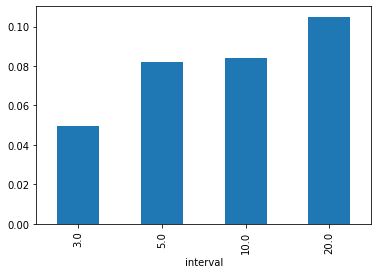

In [387]:
interval_group_df['min'].plot.bar()

mape_test    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

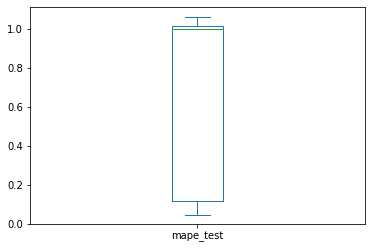

In [388]:
# metrics_df.groupby(by=['model','interval'])['mape_test'].plot.box(subplots=True)
metrics_df['mape_test'].plot.box(subplots=True)

## End